Challenge: Factors that affect life expectancy:

Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the Life Expectancy dataset from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

First, load the dataset.

In [1]:
# Import some packages and libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import math
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connect to database:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df=pd.read_sql_query('select * from lifeexpectancy', con=engine)
engine.dispose()

2.Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [3]:
# Look at the dataset:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Remove space from column names:
df.columns = df.columns.str.strip()
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# Look at the shape:
df.shape

(2938, 22)

In [6]:
# Exploring Nulls and type of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [7]:
# Find out number of uniquevalue and notnull in each columns:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

In [8]:
# Look at the number of nulls in each column:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
# Findout percentage of missing value:
round(df.isnull().sum()*100/df.isnull().count(),2)

Country                             0.00
Year                                0.00
Status                              0.00
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Alcohol                             6.60
percentage expenditure              0.00
Hepatitis B                        18.82
Measles                             0.00
BMI                                 1.16
under-five deaths                   0.00
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
HIV/AIDS                            0.00
GDP                                15.25
Population                         22.19
thinness  1-19 years                1.16
thinness 5-9 years                  1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

In [10]:
#filling_list =['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure',
#               'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 
#               'Income composition of resources', 'Schooling']

#countries = df.Country.unique()
#years = df.Year.unique()
#for year in years:
#    for country in countries:
#        df.loc[(df.Year == year) & (df.Country == country),filling_list]=df.loc[(df.Year == year) & (df.Country == country),filling_list].interpolate()

In [11]:
# Filling missing value by interpolate() and drop others:
filling_list =['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure',
               'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 
               'Income composition of resources', 'Schooling']

countries = df.Country.unique()
for country in countries:
    df.loc[df['Country'] == country,filling_list] = df.loc[df['Country'] == country,filling_list].interpolate()
df.dropna(inplace=True)

In [12]:
# Find out the length of dataset:
len(df)

1987

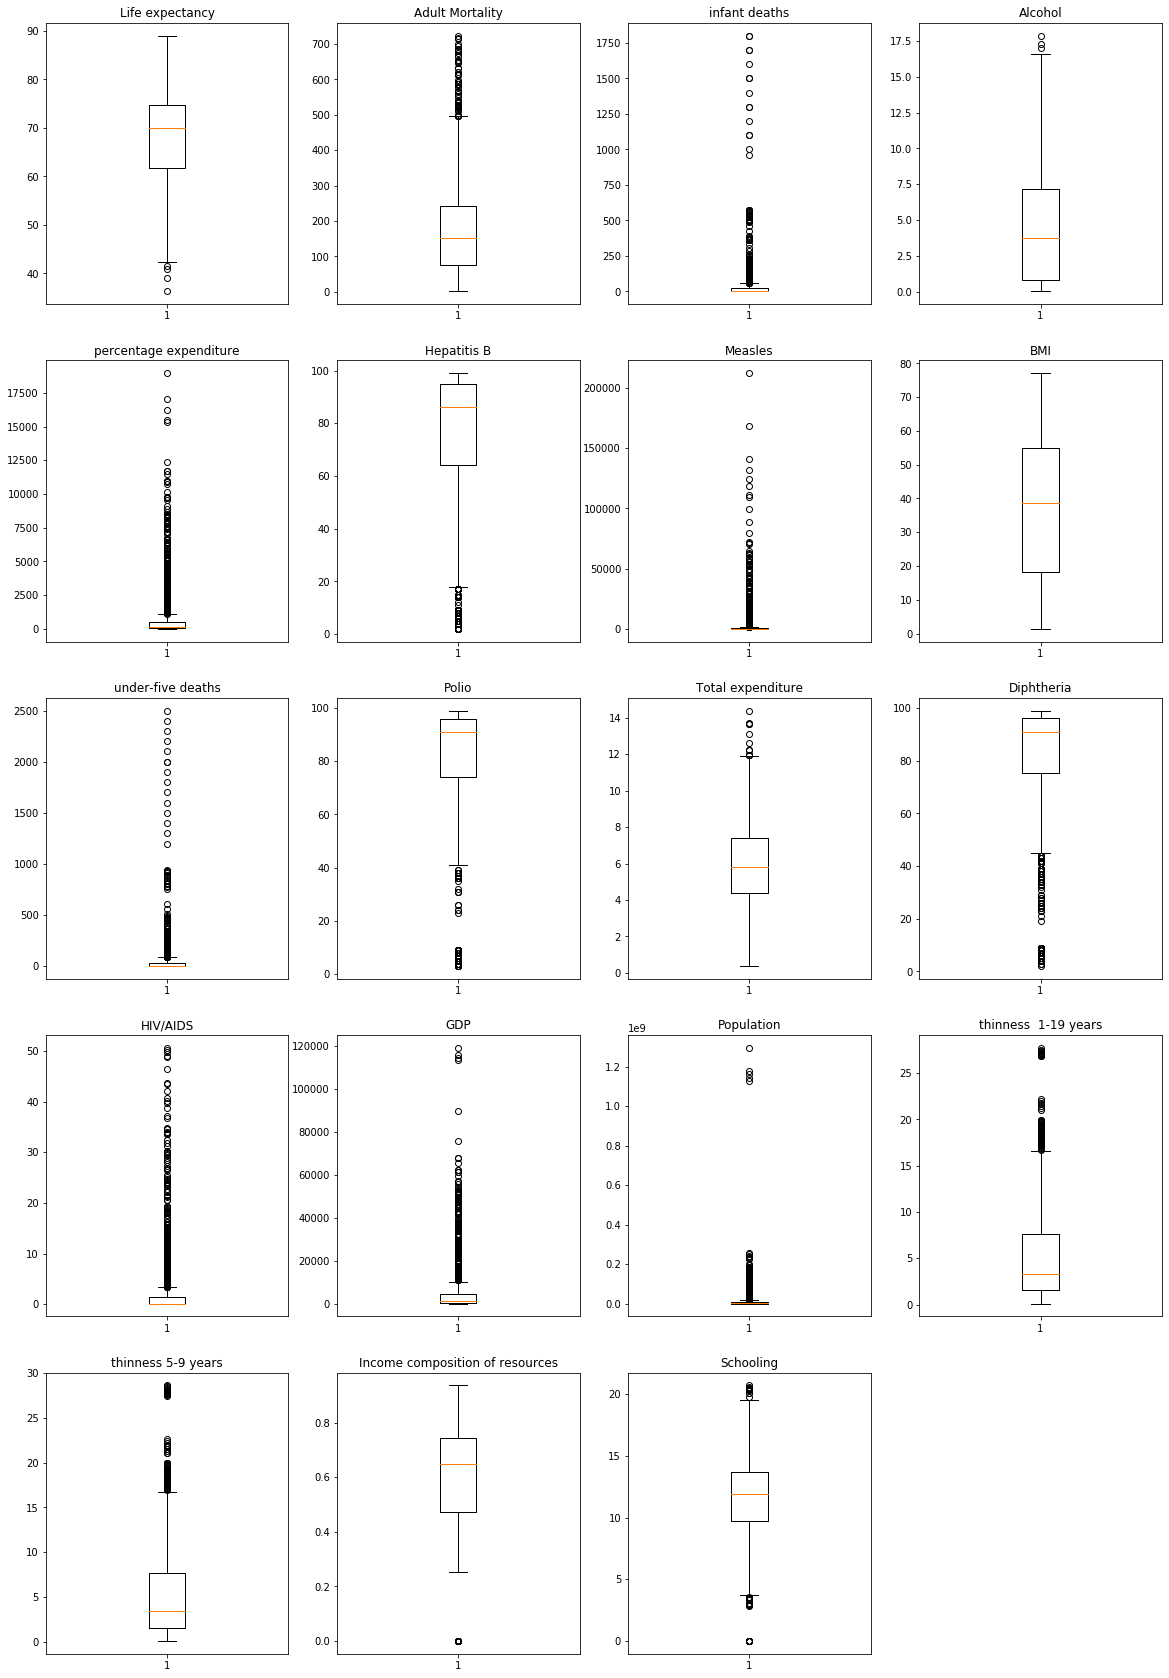

In [13]:
# Using boxplot to see outliers:
dic_columns={'Life expectancy':1, 'Adult Mortality':2, 'infant deaths':3, 'Alcohol':4, 'percentage expenditure':5,
             'Hepatitis B':6, 'Measles':7, 'BMI':8, 'under-five deaths': 9, 'Polio':10, 'Total expenditure':11, 'Diphtheria':12,
             'HIV/AIDS':13, 'GDP':14, 'Population':15, 'thinness  1-19 years':16, 'thinness 5-9 years':17,
             'Income composition of resources':18, 'Schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for col,i in dic_columns.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[col],whis=1.5)
                     plt.title(col)

plt.show()

As you can see, some of variables have outlier in up_end, some in down_end and some in both side.

In [14]:
# Using Tukey's method to see number of outliers in each columns:
for col,i in dic_columns.items():
    q75,q25=np.percentile(df[col],[75,25])
    iqr=q75-q25
    min_val=q25-(iqr*1.5)
    max_val=q75+(iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
           len((np.where((df[col] > max_val)|(df[col] < min_val))[0])),
           len((np.where((df[col] > max_val)|(df[col] < min_val))[0]))*100/1987))


Number of outliers and percentage of it in Life expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in infant deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in percentage expenditure : 232 and 11.675893306492199
Number of outliers and percentage of it in Hepatitis B : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in under-five deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Total expenditure : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of

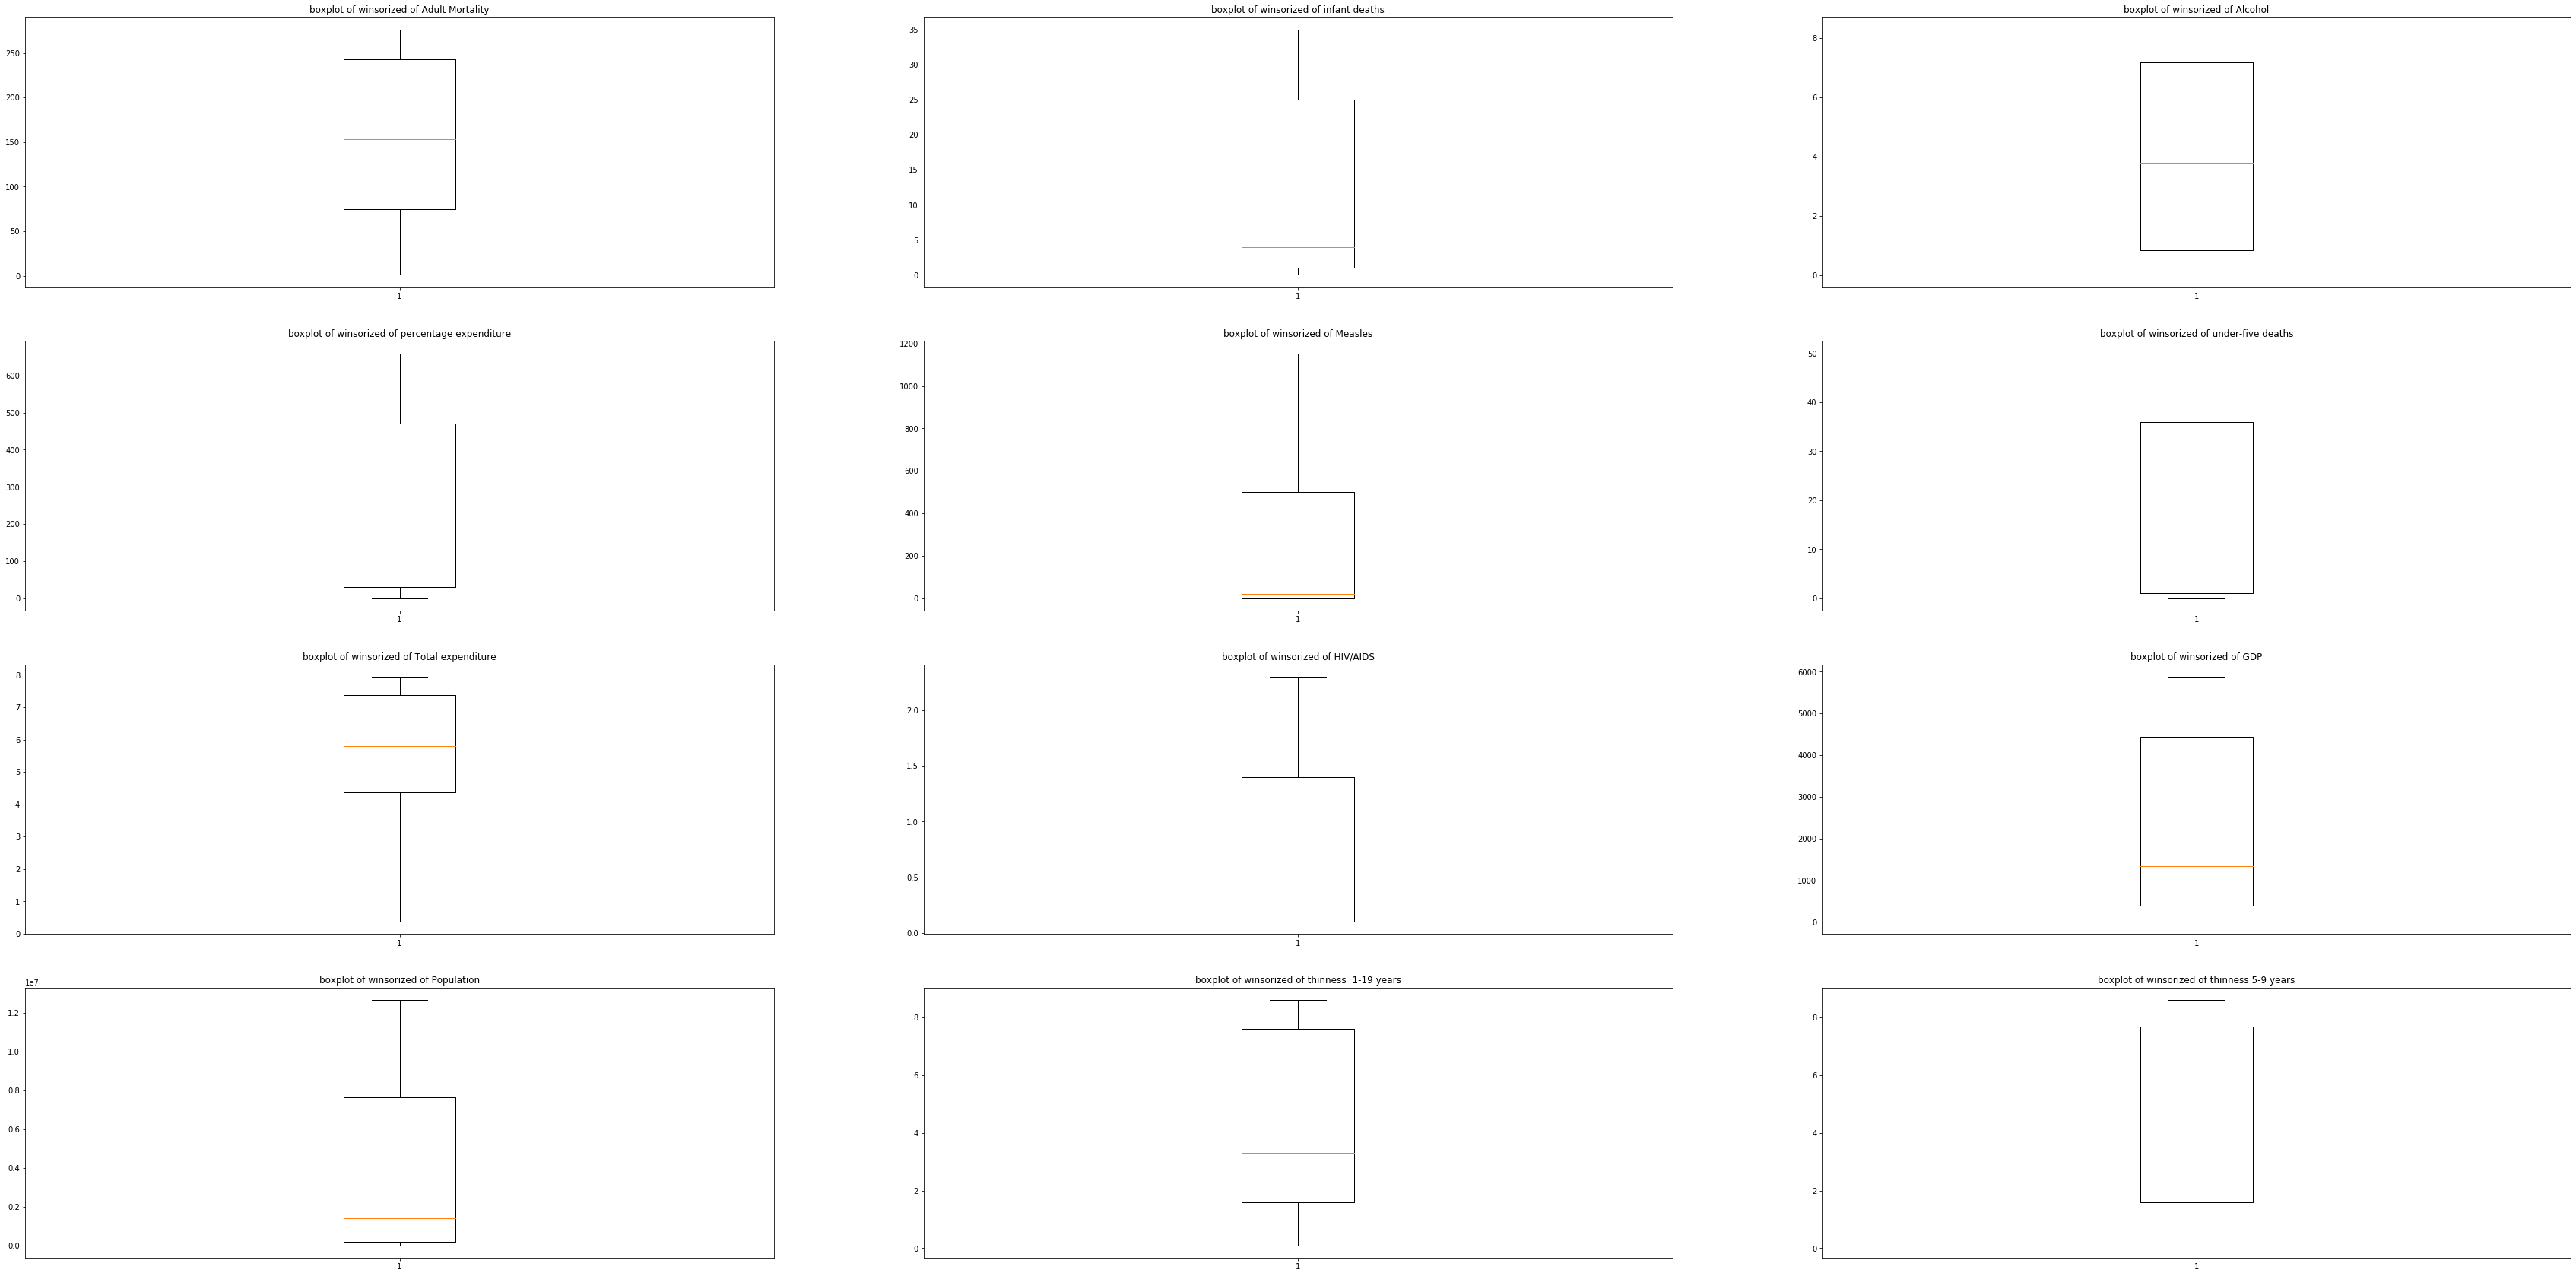

In [15]:
# I think It is better to winsorize one by one number of value that would be cut off less but here using as loop function:
# First I winsorize the up_end outlier and the next the down and the last columns with both side outliers:

dic_columns1={'Adult Mortality':1, 'infant deaths':2, 'Alcohol':3, 'percentage expenditure':4, 'Measles':5,
             'under-five deaths': 6, 'Total expenditure':7, 'HIV/AIDS':8, 'GDP':9, 'Population':10,
             'thinness  1-19 years':11, 'thinness 5-9 years':12}
winsorized1={}
for col,i in dic_columns1.items():
    winsorized1[f'{col}']= winsorize(df[col], (0, 0.19))

plt.figure(figsize=(60,30))
for col,i in dic_columns1.items():
    plt.subplot(4,3,i)
    plt.boxplot(winsorized1[f'{col}'])    
    plt.title(f'boxplot of winsorized of {col}')

plt.show()

Removed all up_end outliers.

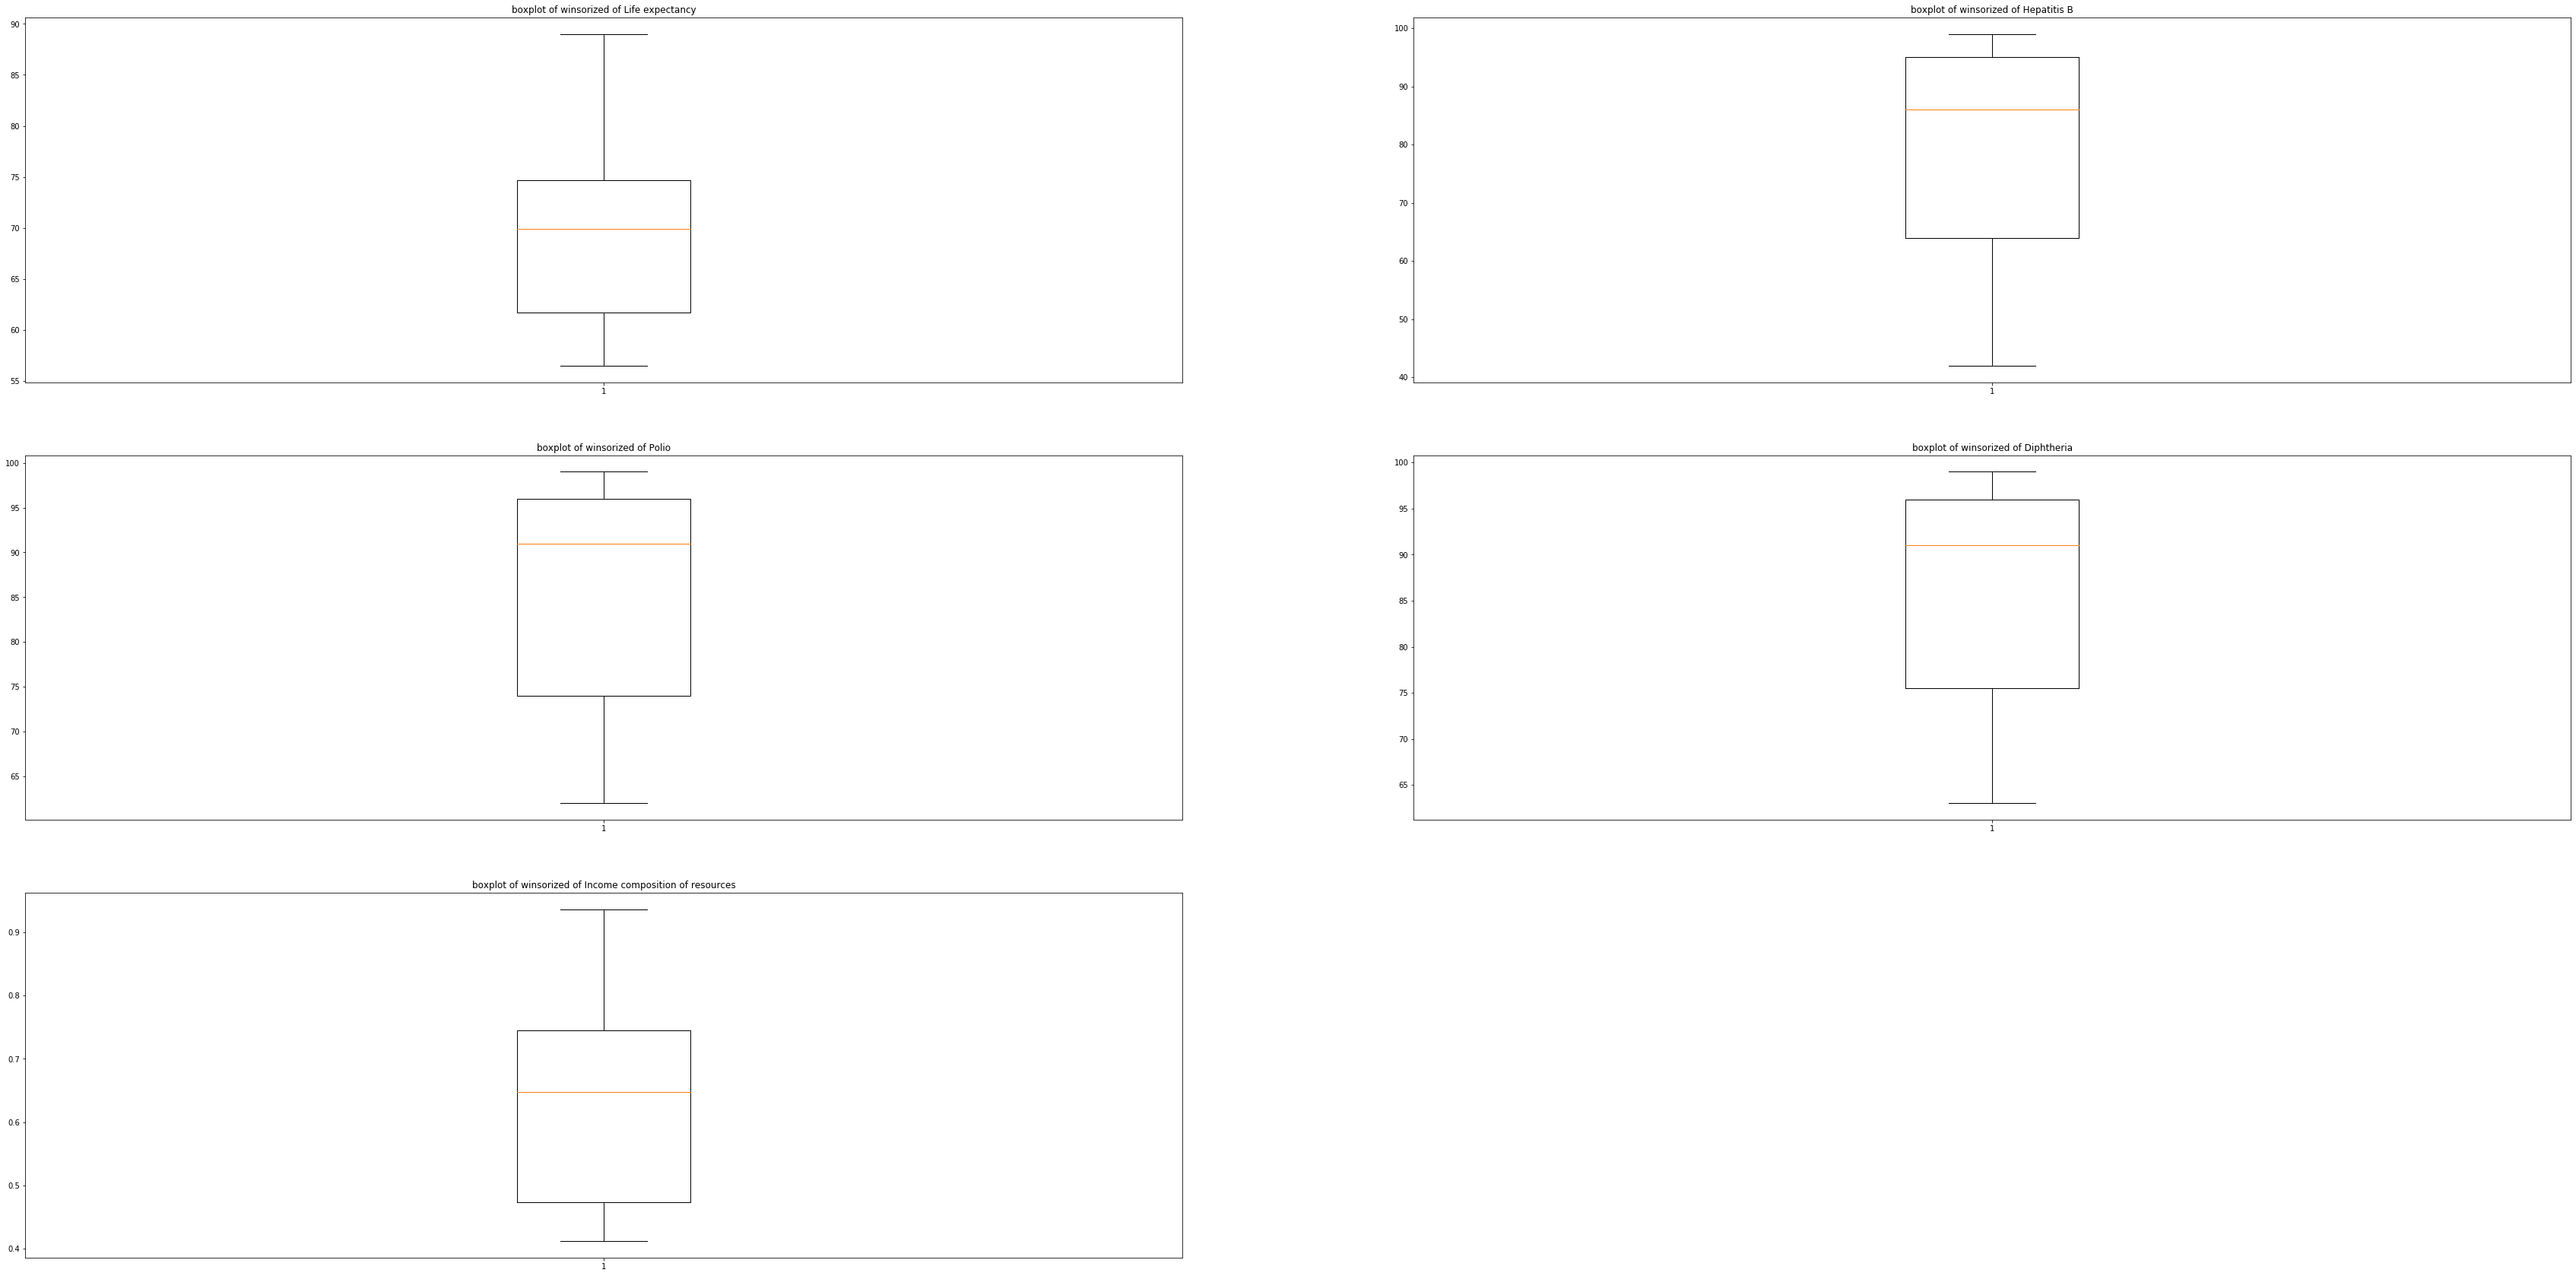

In [16]:
# I winsorize the down_end outlier:
dic_columns2 = {'Life expectancy':1,'Hepatitis B':2, 'Polio':3, 'Diphtheria':4, 'Income composition of resources':5}
winsorized2={}
for col,i in dic_columns2.items():
    winsorized2[f'{col}']= winsorize(df[col], (0.15, 0))

plt.figure(figsize=(60,30))
for col,i in dic_columns2.items():
    plt.subplot(3,2,i)
    plt.boxplot(winsorized2[f'{col}'])    
    plt.title(f'boxplot of winsorized of {col}')

plt.show()   



Removed all down_end outliers.

Text(0.5, 1.0, 'winsorized of schooling')

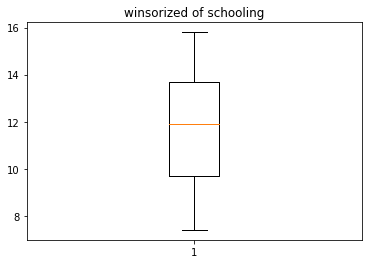

In [17]:
# I winsorize both side:
winsorized_schooling = winsorize(df['Schooling'], (0.10,0.10))
plt.boxplot(winsorized_schooling)
plt.title('winsorized of schooling')

Removed all both side outliers.

In [18]:
# Using Tukey's method again to check number of outliers for columns in up_end:
for col,i in winsorized1.items():
    q75,q25=np.percentile(winsorized1[f'{col}'],[75,25])
    iqr=q75-q25
    min_val=q25-(iqr*1.5)
    max_val=q75+(iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
           len((np.where((winsorized1[f'{col}'] > max_val)|(winsorized1[f'{col}'] < min_val))[0])),
           len((np.where((winsorized1[f'{col}'] > max_val)|(winsorized1[f'{col}'] < min_val))[0]))*100/1987))


Number of outliers and percentage of it in Adult Mortality : 0 and 0.0
Number of outliers and percentage of it in infant deaths : 0 and 0.0
Number of outliers and percentage of it in Alcohol : 0 and 0.0
Number of outliers and percentage of it in percentage expenditure : 0 and 0.0
Number of outliers and percentage of it in Measles : 0 and 0.0
Number of outliers and percentage of it in under-five deaths : 0 and 0.0
Number of outliers and percentage of it in Total expenditure : 0 and 0.0
Number of outliers and percentage of it in HIV/AIDS : 0 and 0.0
Number of outliers and percentage of it in GDP : 0 and 0.0
Number of outliers and percentage of it in Population : 0 and 0.0
Number of outliers and percentage of it in thinness  1-19 years : 0 and 0.0
Number of outliers and percentage of it in thinness 5-9 years : 0 and 0.0


In [19]:
# Using Tukey's method again to check number of outliersfor columns in down_end:
for col,i in winsorized2.items():
    q75,q25=np.percentile(winsorized2[f'{col}'],[75,25])
    iqr=q75-q25
    min_val=q25-(iqr*1.5)
    max_val=q75+(iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
           len((np.where((winsorized2[f'{col}'] > max_val)|(winsorized2[f'{col}'] < min_val))[0])),
           len((np.where((winsorized2[f'{col}'] > max_val)|(winsorized2[f'{col}'] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life expectancy : 0 and 0.0
Number of outliers and percentage of it in Hepatitis B : 0 and 0.0
Number of outliers and percentage of it in Polio : 0 and 0.0
Number of outliers and percentage of it in Diphtheria : 0 and 0.0
Number of outliers and percentage of it in Income composition of resources : 0 and 0.0


In [20]:
# Using Tukey's method again to check number of outliers for column in both side:
q75,q25 = np.percentile(winsorized_schooling,[75,25])
iqr=q75-q25
min_val=q25-(iqr*1.5)
max_val= q75+(iqr*1.5)
print('Number of outliers and percentage of it is:',
      len((np.where((winsorized_schooling > max_val)|(winsorized_schooling < min_val))[0])),
      len((np.where((winsorized_schooling > max_val)|(winsorized_schooling < min_val))[0]))*100/1987)

Number of outliers and percentage of it is: 0 0.0


3.Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In [21]:
# Adding winsorized column to dataset:
df['life_expectancy_winsorized'] = winsorized2['Life expectancy']
df['adult_Mortality_winsorized'] = winsorized1['Adult Mortality']
df['infant_deaths_winsorized'] = winsorized1['infant deaths']
df['alcohol_winsorized'] = winsorized1['Alcohol']
df['percentage_expenditure_winsorized'] = winsorized1['percentage expenditure']
df['Hepatitis_B_winsorized'] = winsorized2['Hepatitis B']
df['Measles_winsorized'] = winsorized1['Measles']
df['under-fivedeaths_winsorized'] = winsorized1['under-five deaths']
df['polio_winsorized'] = winsorized2['Polio']
df['total_expenditure_winsorized'] = winsorized1['Total expenditure']
df['Diphtheria_winsorized'] = winsorized2['Diphtheria']
df['HIV/AIDS_winsorized'] = winsorized1['HIV/AIDS']
df['GDP_winsorized'] = winsorized1['GDP']
df['population_winsorized'] = winsorized1['Population']
df['thinness_1-19years_winsorized'] = winsorized1['thinness  1-19 years']
df['thinness_5-9years_winsorized'] = winsorized1['thinness 5-9 years']
df['Income_compositionofresources_winsorized'] = winsorized2['Income composition of resources']
df['schooling_winsorized'] = winsorized_schooling

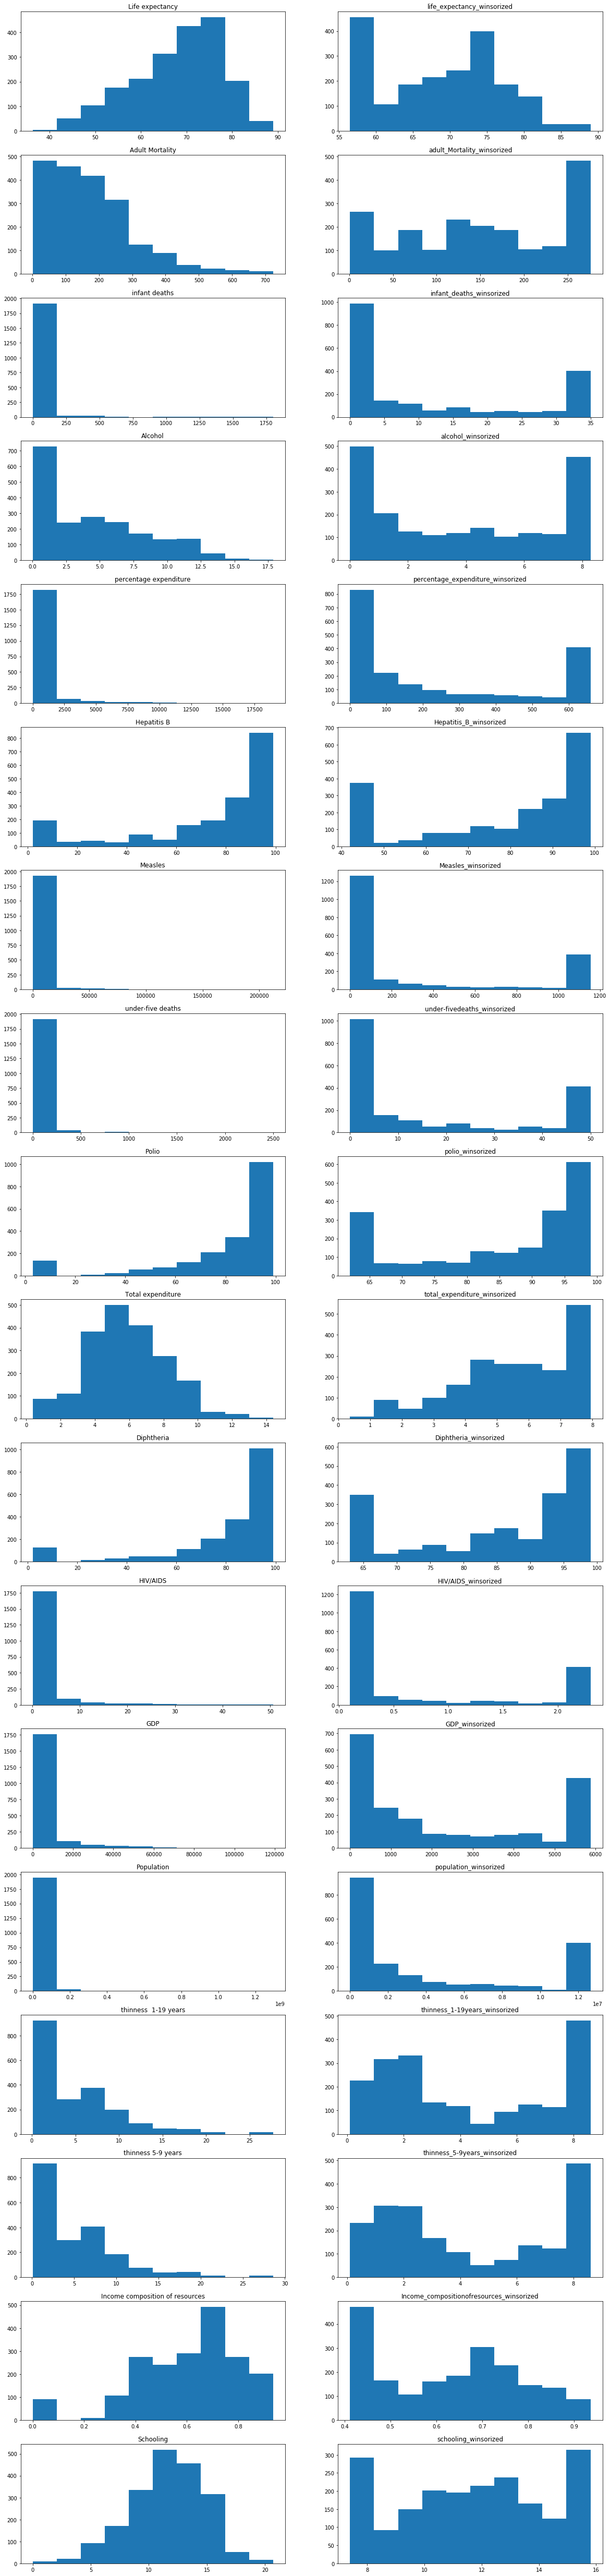

In [22]:
# Using hist plot to compare orginal columns with winsorized ones:
df_columns = ['Life expectancy', 'life_expectancy_winsorized', 'Adult Mortality', 'adult_Mortality_winsorized', 
              'infant deaths', 'infant_deaths_winsorized', 'Alcohol', 'alcohol_winsorized', 'percentage expenditure',
              'percentage_expenditure_winsorized', 'Hepatitis B', 'Hepatitis_B_winsorized', 'Measles', 'Measles_winsorized',
              'under-five deaths', 'under-fivedeaths_winsorized', 'Polio', 'polio_winsorized', 'Total expenditure', 
              'total_expenditure_winsorized', 'Diphtheria', 'Diphtheria_winsorized', 'HIV/AIDS', 'HIV/AIDS_winsorized', 'GDP',
              'GDP_winsorized', 'Population', 'population_winsorized', 'thinness  1-19 years', 'thinness_1-19years_winsorized',
              'thinness 5-9 years', 'thinness_5-9years_winsorized', 'Income composition of resources', 
              'Income_compositionofresources_winsorized', 'Schooling', 'schooling_winsorized']
plt.figure(figsize=(20,90))
for i in range(len(df_columns)):
    plt.subplot(18,2,i+1)
    plt.hist(df[df_columns[i]])
    plt.title(df_columns[i])

As you can see, compare between original and winsorized variables, the winsorized one are more close to normal distribution.

In [23]:
# Get statistical information summary for numerical columns:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,polio_winsorized,total_expenditure_winsorized,Diphtheria_winsorized,HIV/AIDS_winsorized,GDP_winsorized,population_winsorized,thinness_1-19years_winsorized,thinness_5-9years_winsorized,Income_compositionofresources_winsorized,schooling_winsorized
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,...,85.121792,5.643709,85.448415,0.718017,2331.674855,4.071018e+06,4.328535,4.363865,0.628217,11.735783
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,...,13.307626,1.871023,12.830278,0.890906,2226.481383,4.865616e+06,3.022929,3.028434,0.155098,2.654285
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,...,62.000000,0.370000,63.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.412000,7.400000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,...,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,...,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,...,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,...,99.000000,7.940000,99.000000,2.300000,5878.761270,1.263390e+07,8.600000,8.600000,0.936000,15.800000


In [24]:
# Get statistical information summary for string columns:

df.describe(include=['O'])

,Country,Status
count,1987,1987
unique,133,2
top,Albania,Developing
freq,16,1702


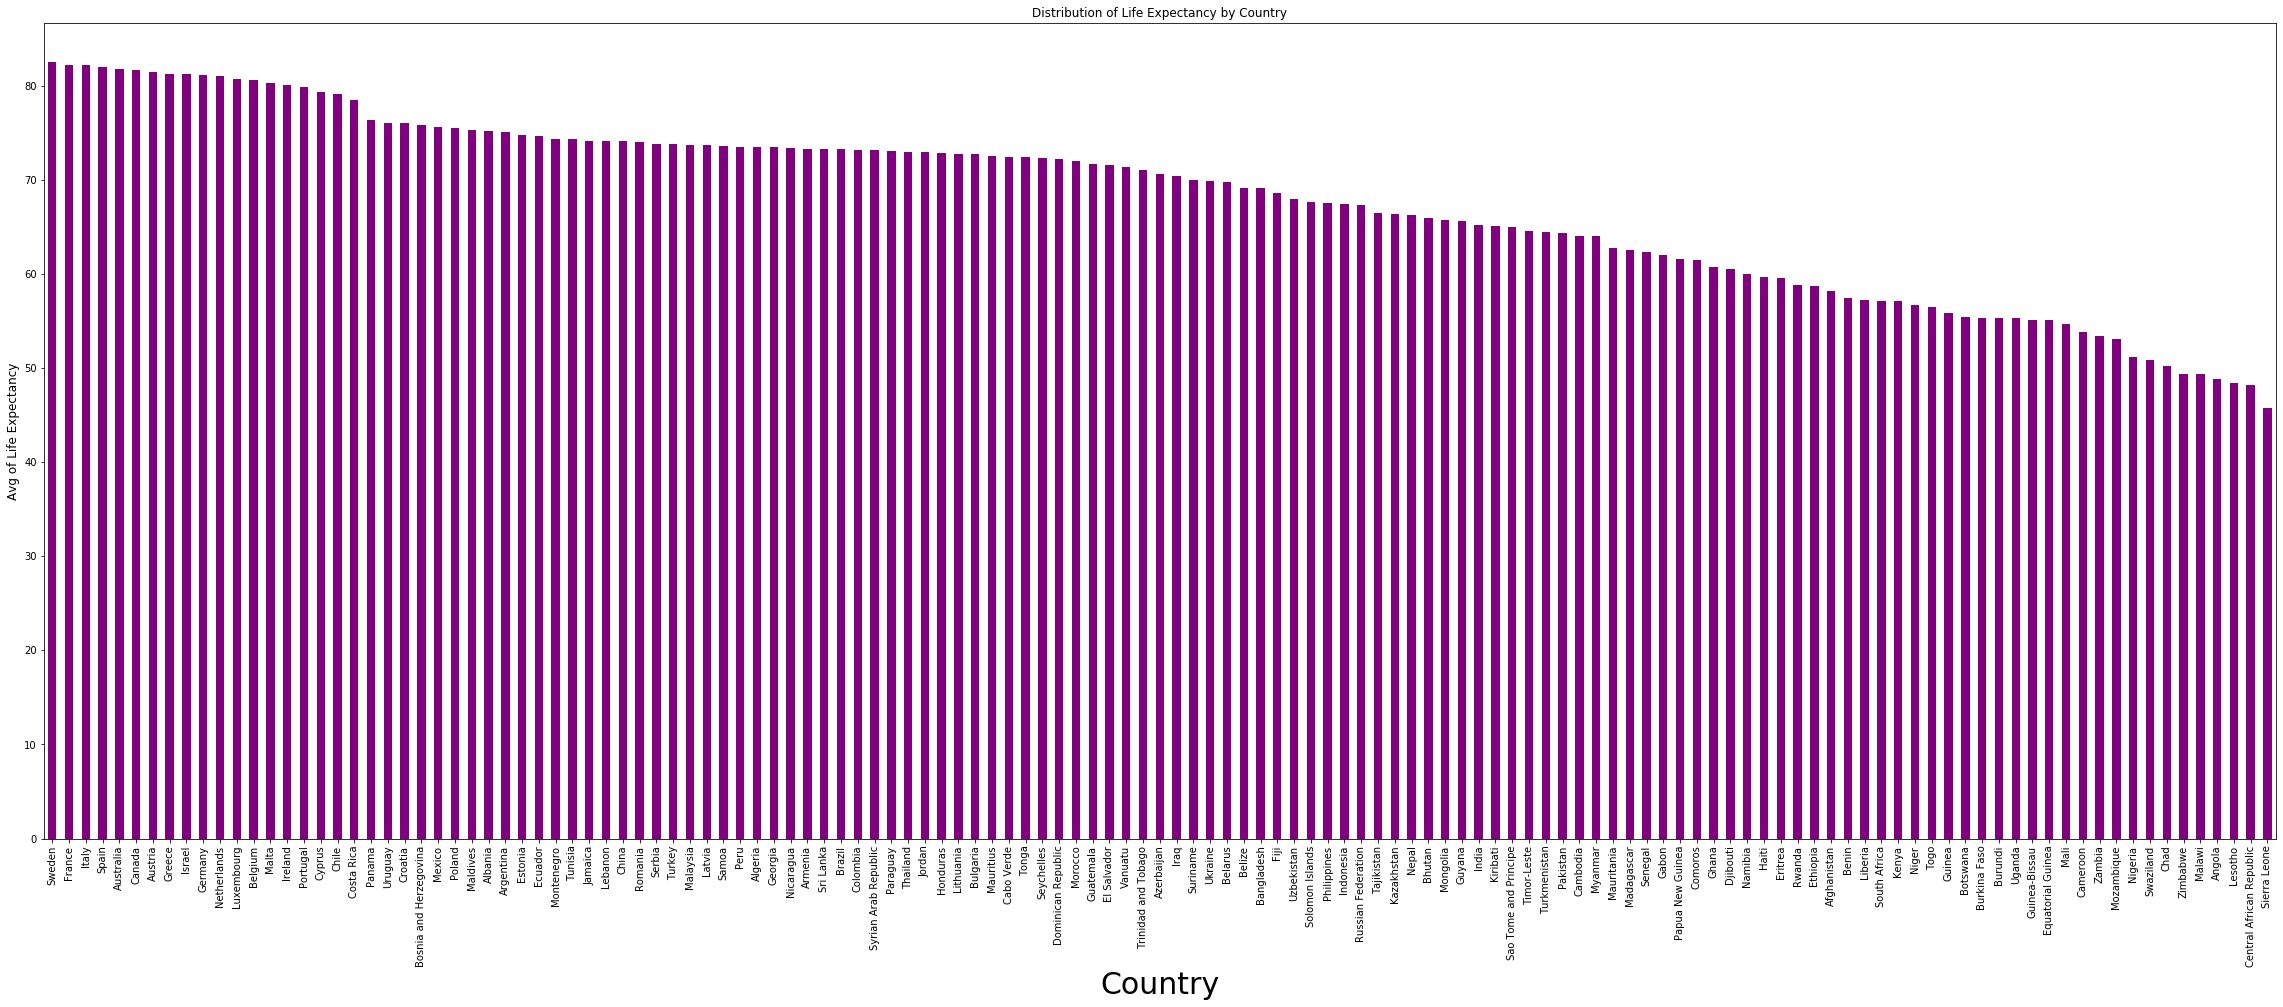

In [25]:
# Comparing categorical column(country) with target variable wich is continus column(Life expectancy):
country_le=df.groupby('Country')['Life expectancy'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(40,15), fontsize=10, color='purple')
plt.xlabel("Country",fontsize=30)
plt.ylabel("Avg of Life Expectancy",fontsize=12)
plt.title("Distribution of Life Expectancy by Country")
plt.show()

As you can see, Sweden has most life expectancy in the orginal one.

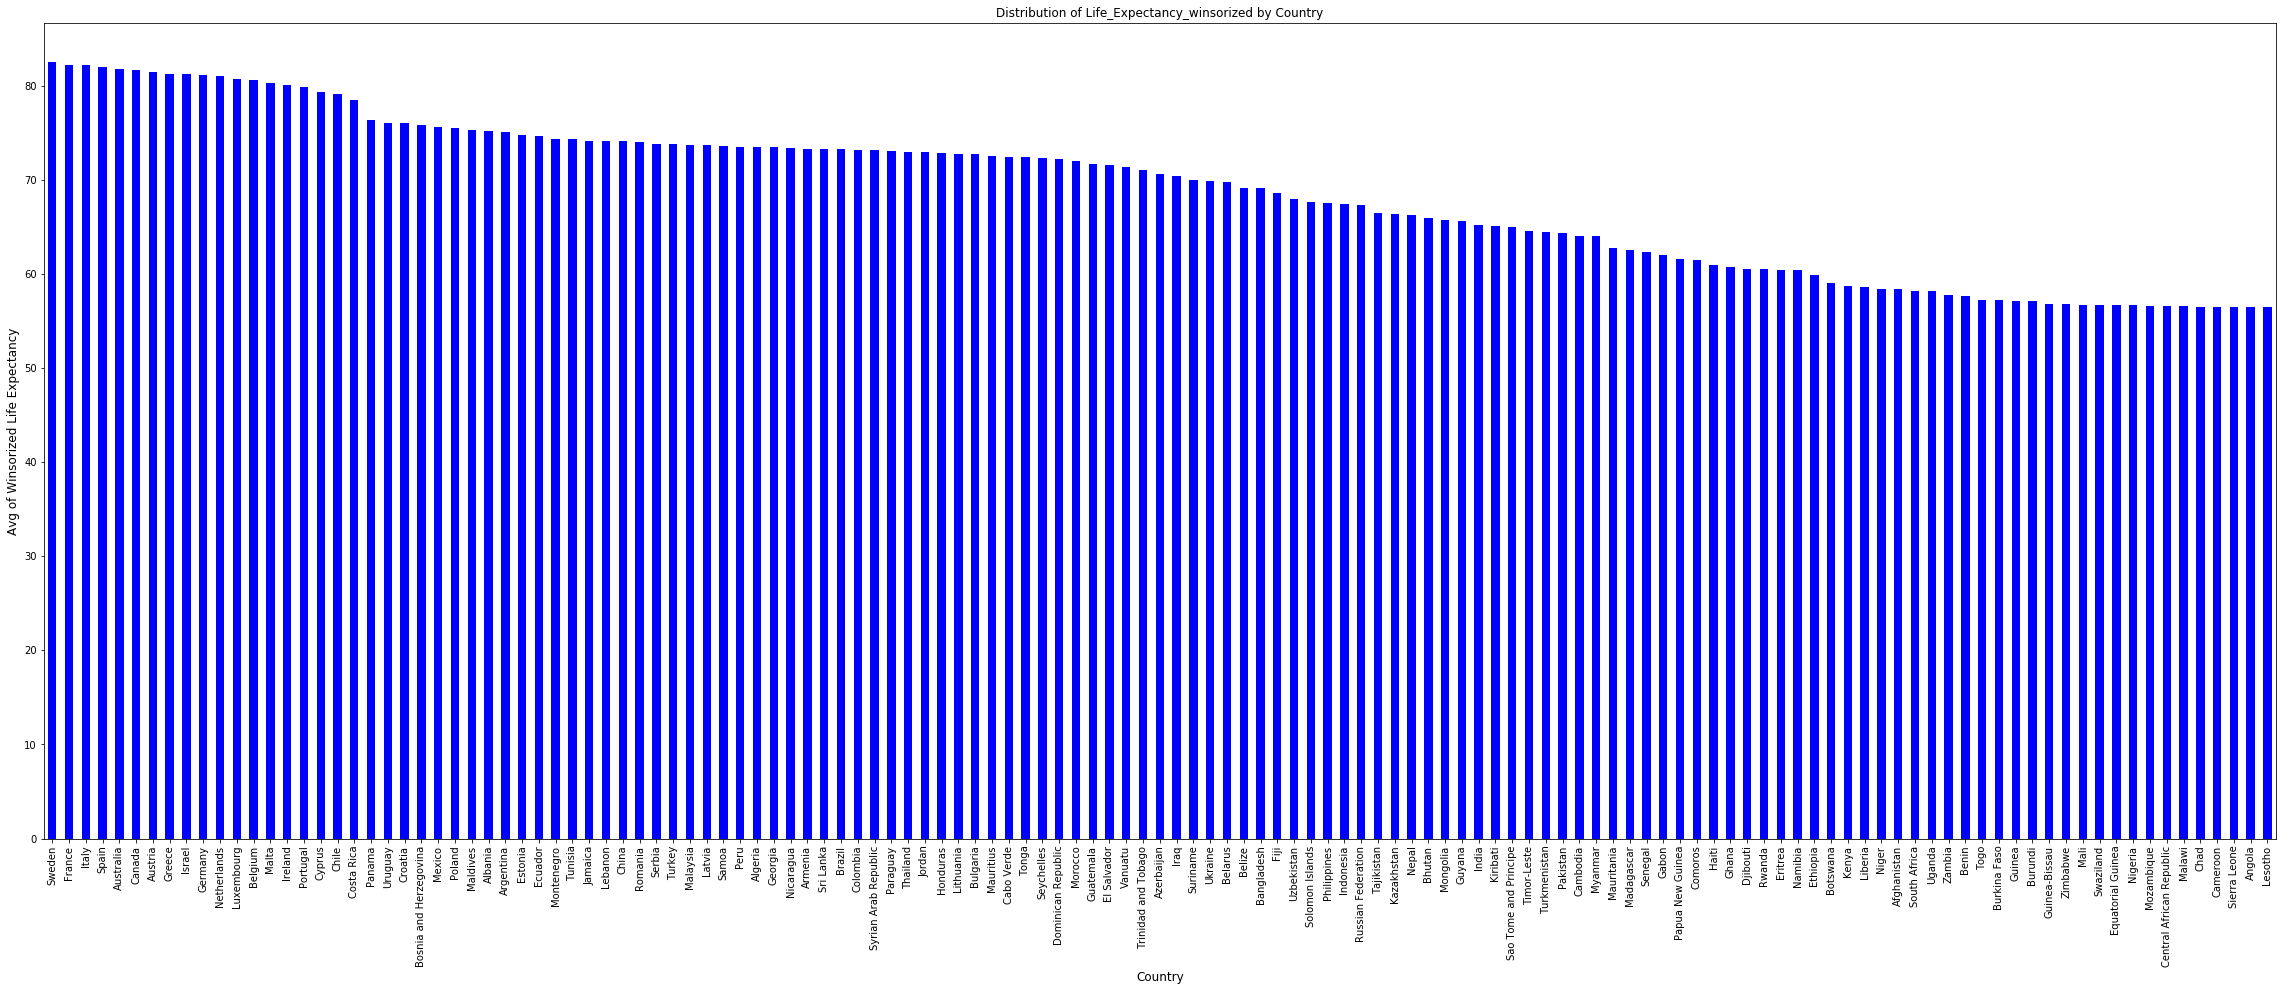

In [26]:
# Comparing categorical column(country) with target variable wich is continus column(winsorized Life expectancy):
country_le=df.groupby('Country').life_expectancy_winsorized.mean().sort_values(ascending=False).plot(kind='bar', figsize=(40,15), fontsize=10, color='blue')
plt.xlabel("Country",fontsize=12)
plt.ylabel("Avg of Winsorized Life Expectancy",fontsize=12)
plt.title("Distribution of Life_Expectancy_winsorized by Country")
plt.show()

As you can see, Sweden has most life expectancy in the wisorized one.

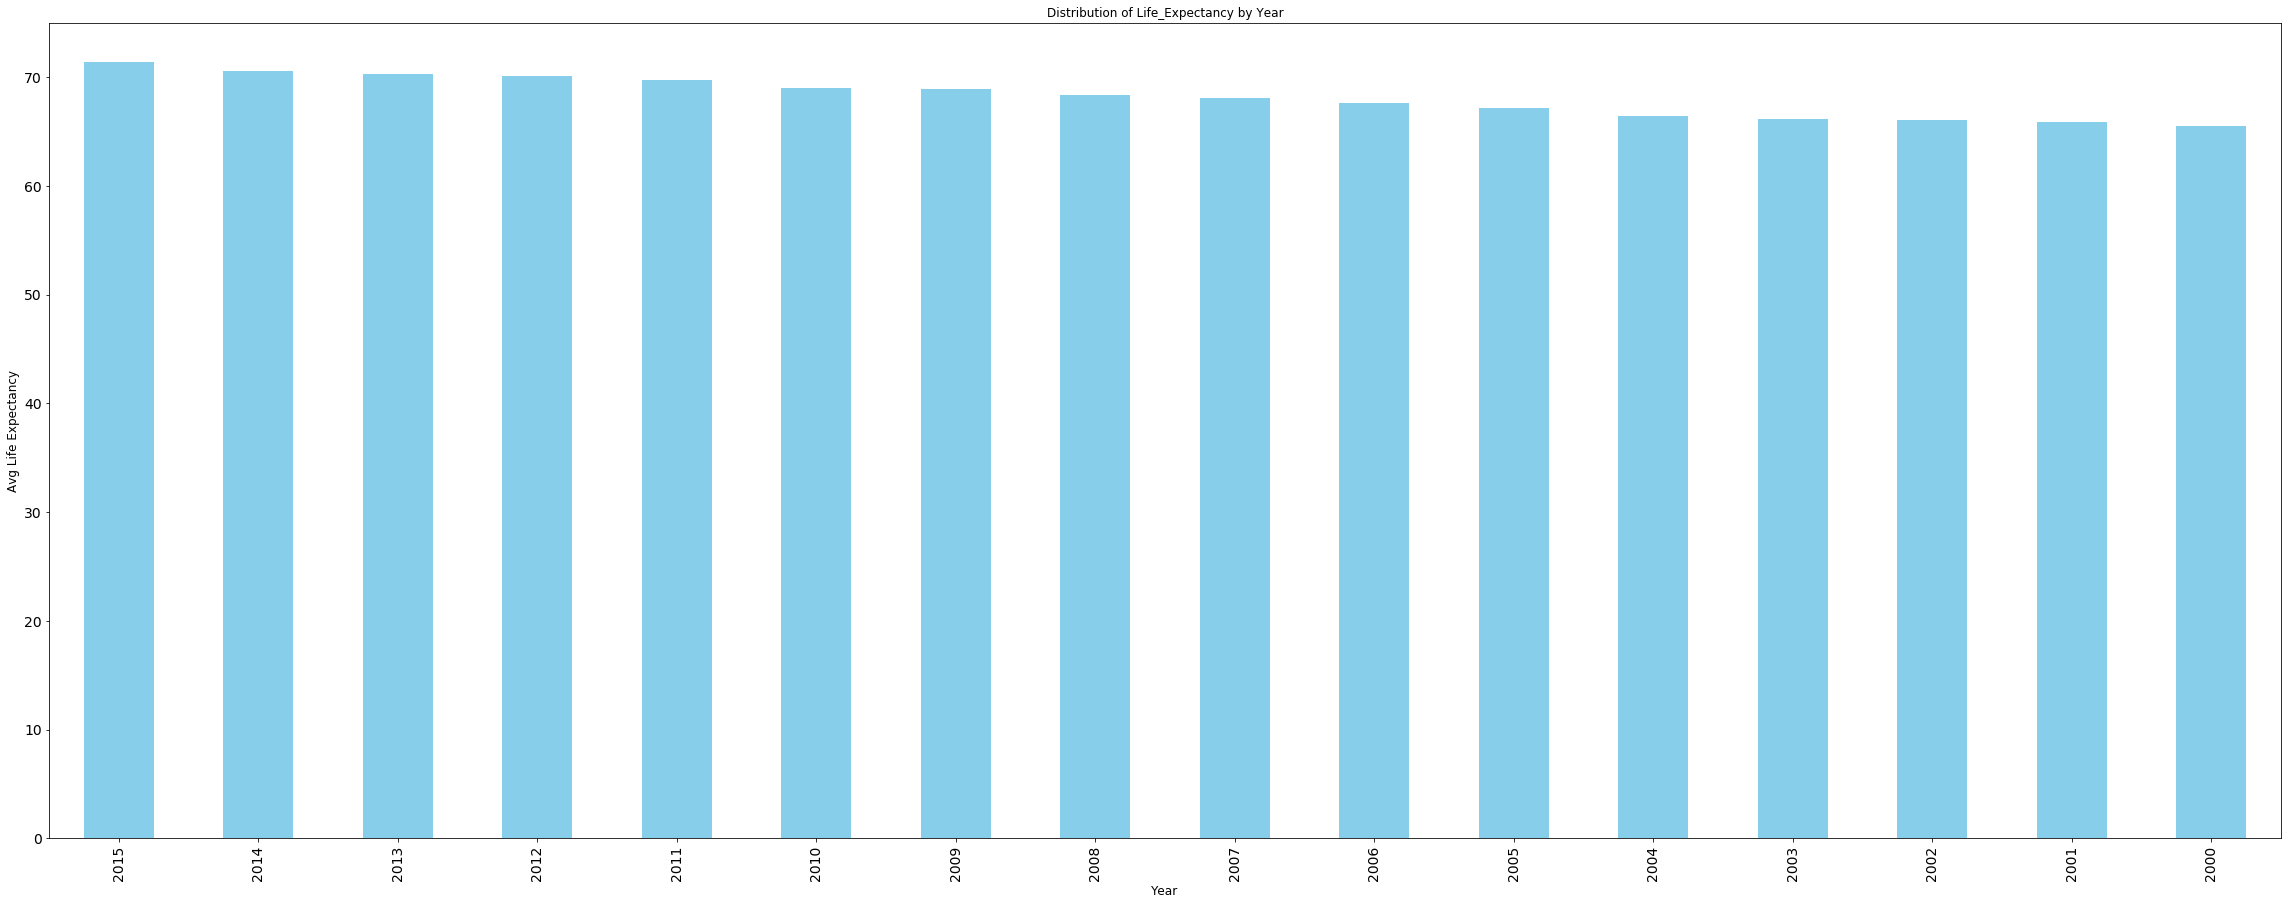

In [27]:
# Comparing categorical column(year) with target variable wich is continus column(Life expectancy):
df.groupby('Year')['Life expectancy'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(40,15), fontsize=14, color='skyblue')
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("Distribution of Life_Expectancy by Year")
plt.show()

The year of 2015 has the most life expectancy.

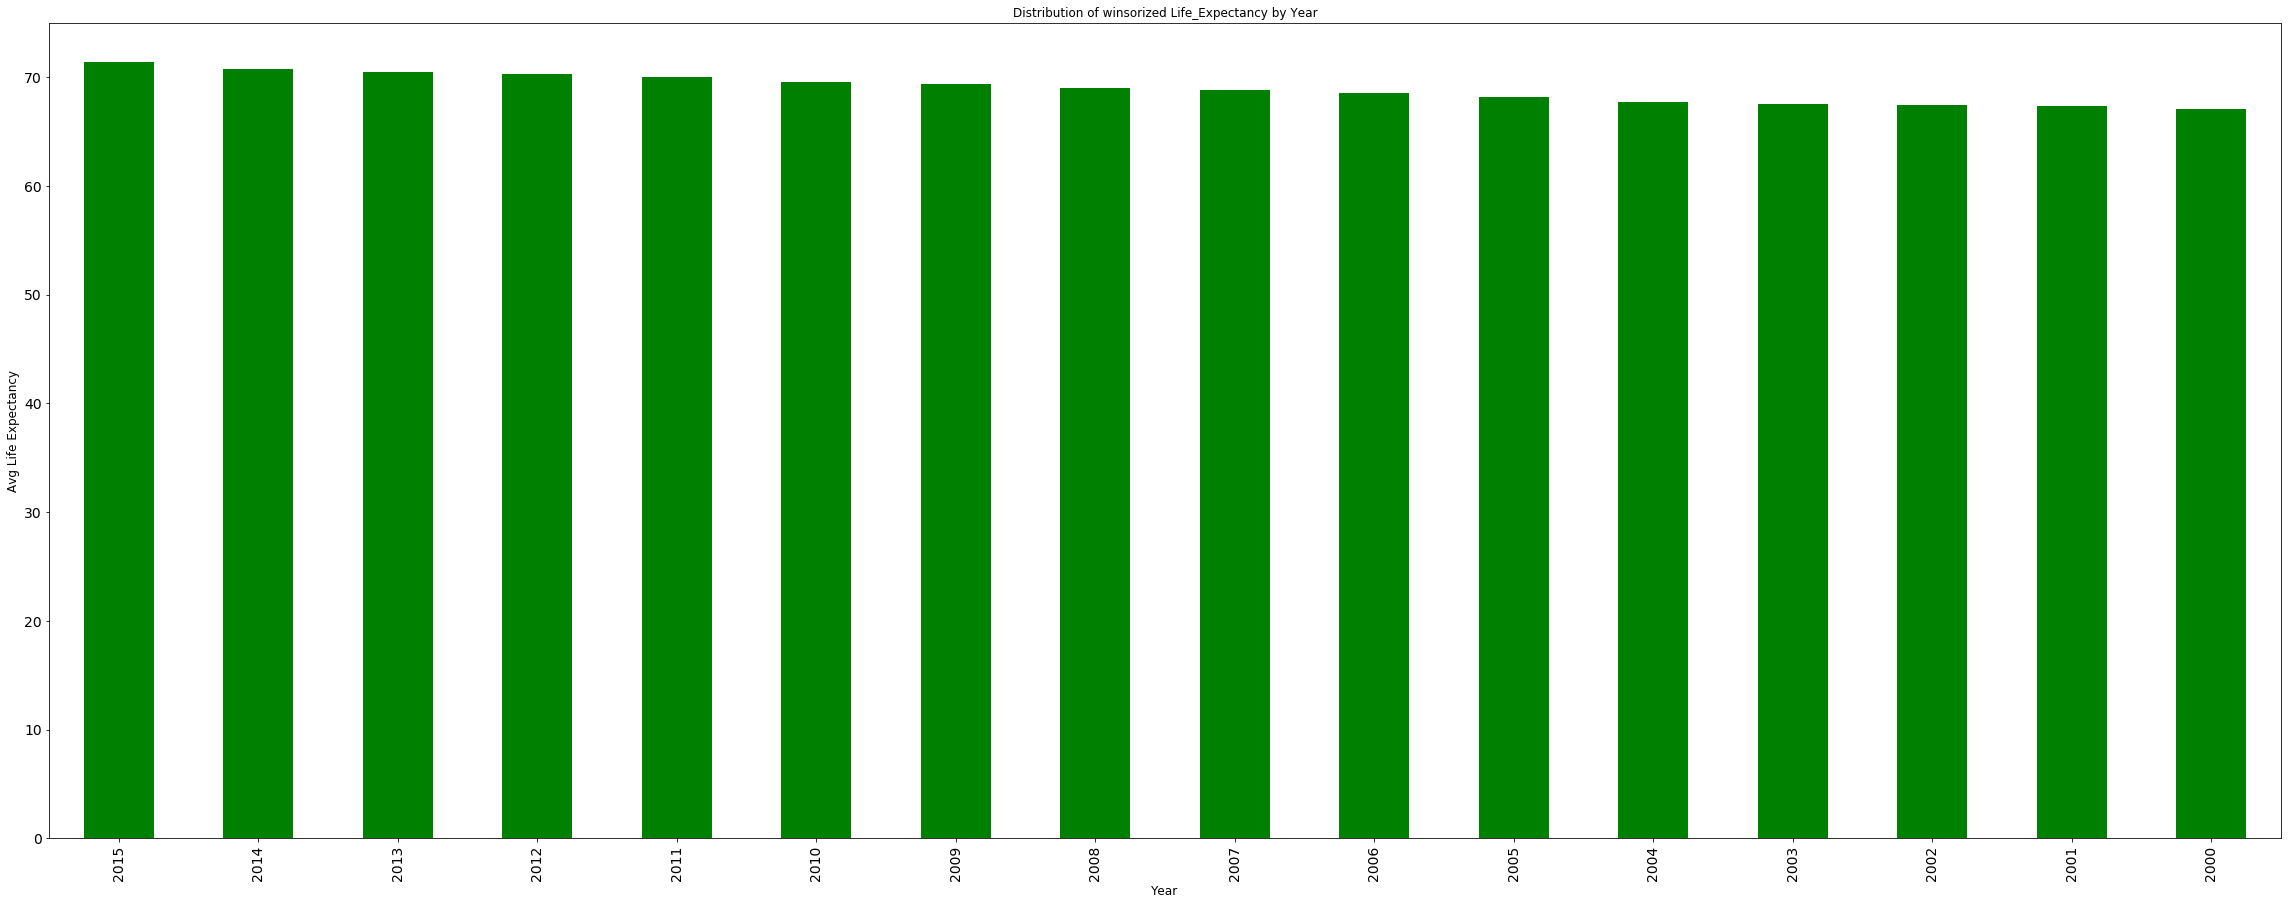

In [28]:
# Comparing categorical column(year) with target variable wich is continus column(winsorized Life expectancy):
df.groupby('Year').life_expectancy_winsorized.mean().sort_values(ascending=False).plot(kind='bar', figsize=(40,15), fontsize=14, color='green')
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("Distribution of winsorized Life_Expectancy by Year")
plt.show()

The year of 2015 has the most life expectancy.

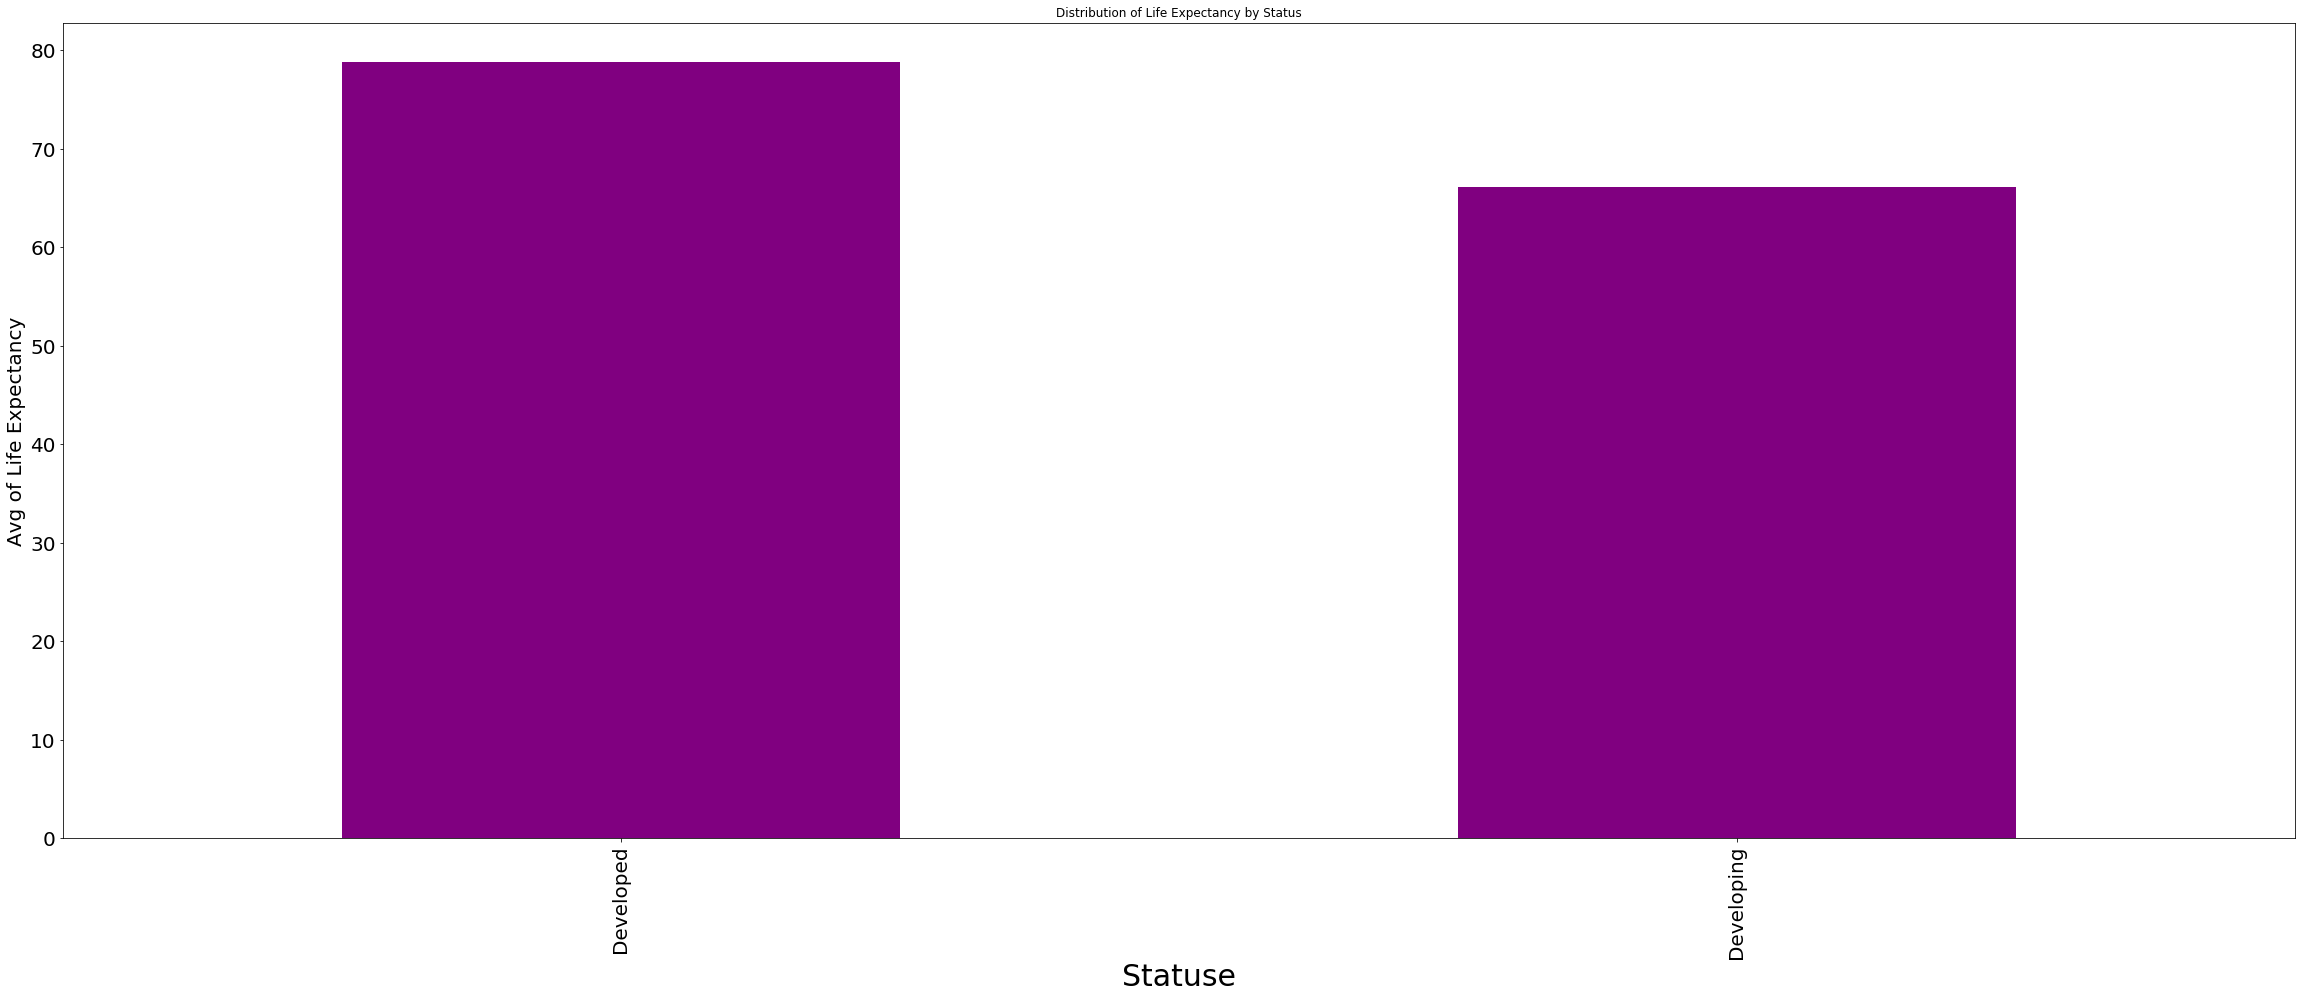

In [29]:
# # Comparing categorical column(Status) with target variable wich is continus column(Life expectancy):
df.groupby('Status')['Life expectancy'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(40,15), fontsize=20, color='purple')
plt.xlabel("Statuse",fontsize=30)
plt.ylabel("Avg of Life Expectancy",fontsize=20)
plt.title("Distribution of Life Expectancy by Status")
plt.show()

The developed countries have higher average of life expectancy than developing countries.

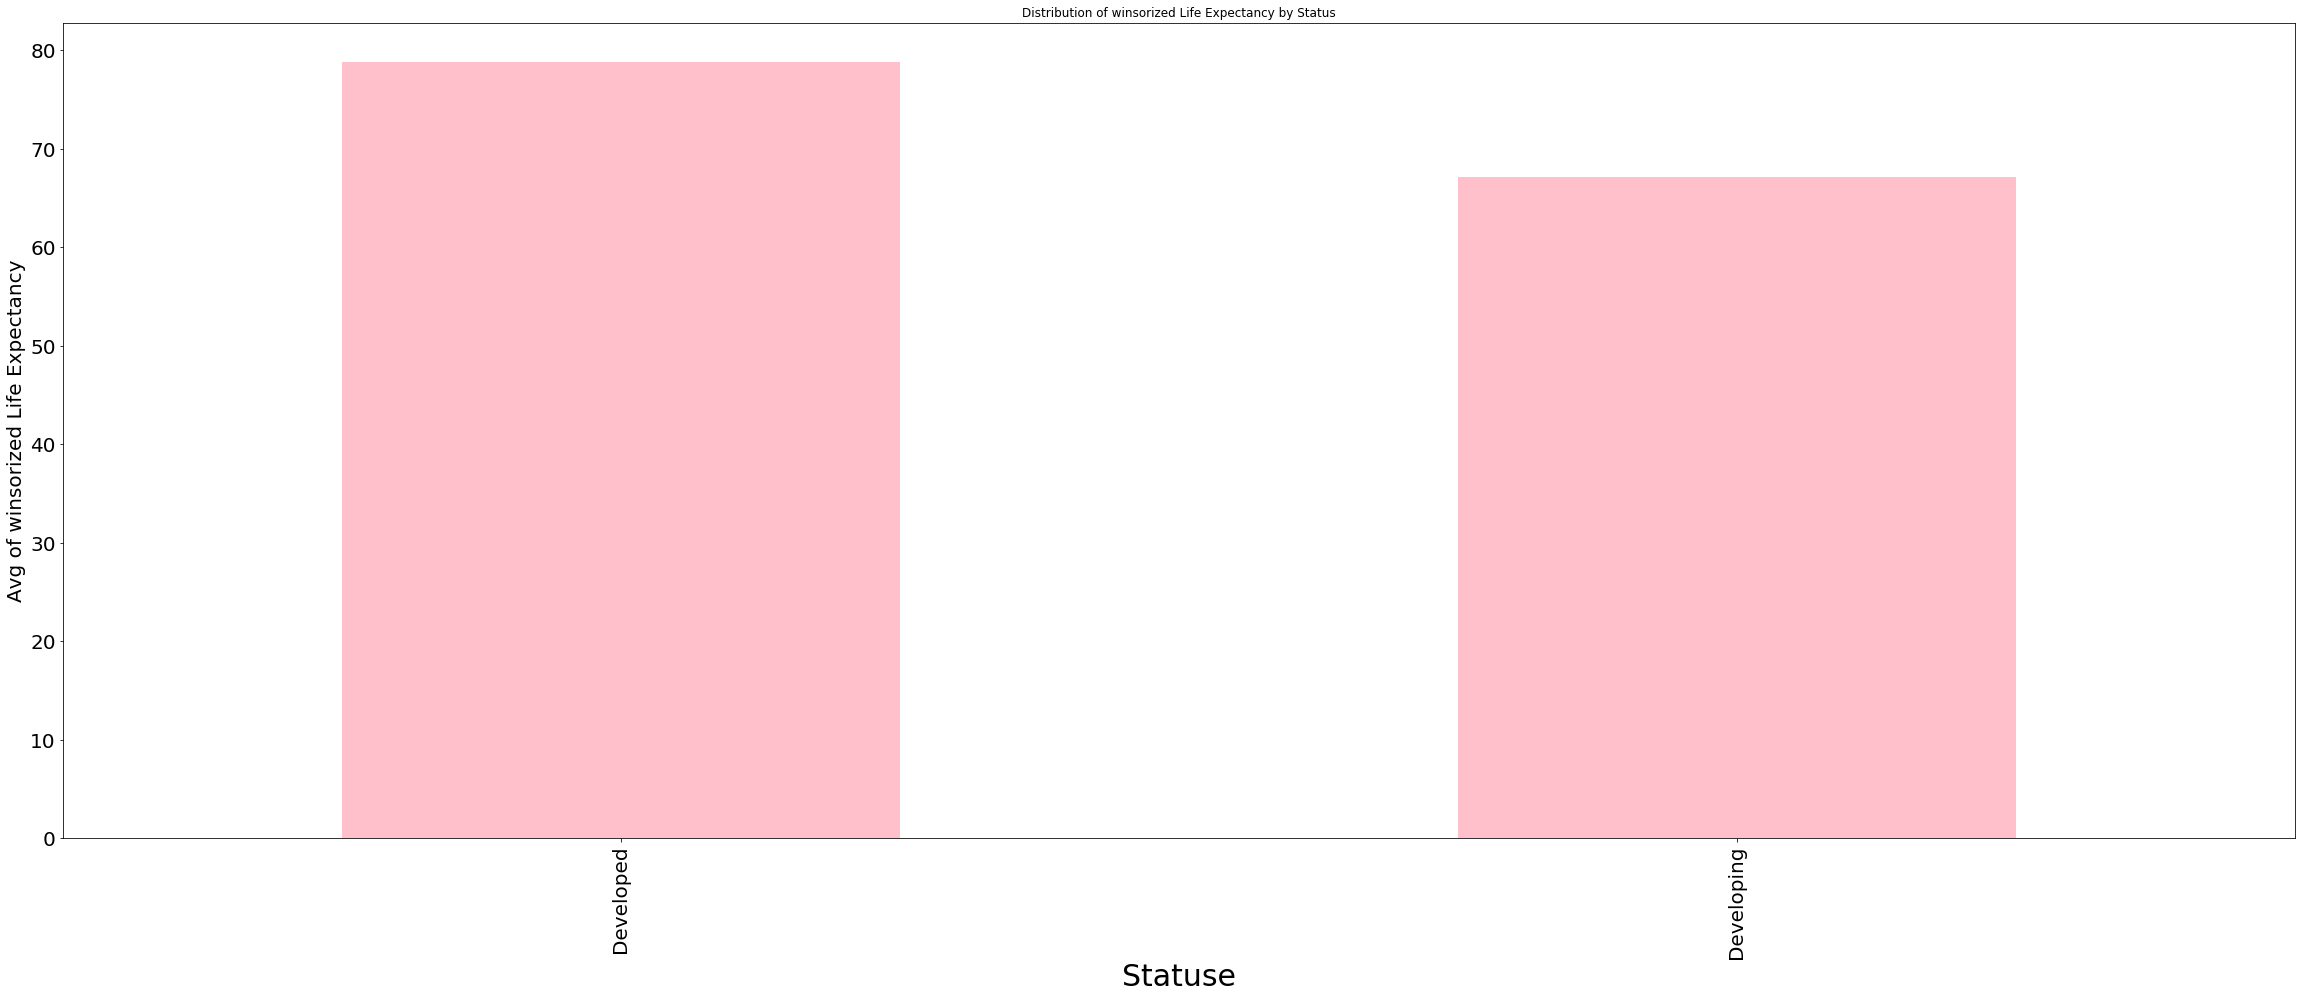

In [30]:
# Comparing categorical column(Status) with target variable wich is continus column(winsorized Life expectancy):
df.groupby('Status').life_expectancy_winsorized.mean().sort_values(ascending=False).plot(kind='bar', figsize=(40,15), fontsize=20, color='pink')
plt.xlabel("Statuse",fontsize=30)
plt.ylabel("Avg of winsorized Life Expectancy",fontsize=20)
plt.title("Distribution of winsorized Life Expectancy by Status")
plt.show()

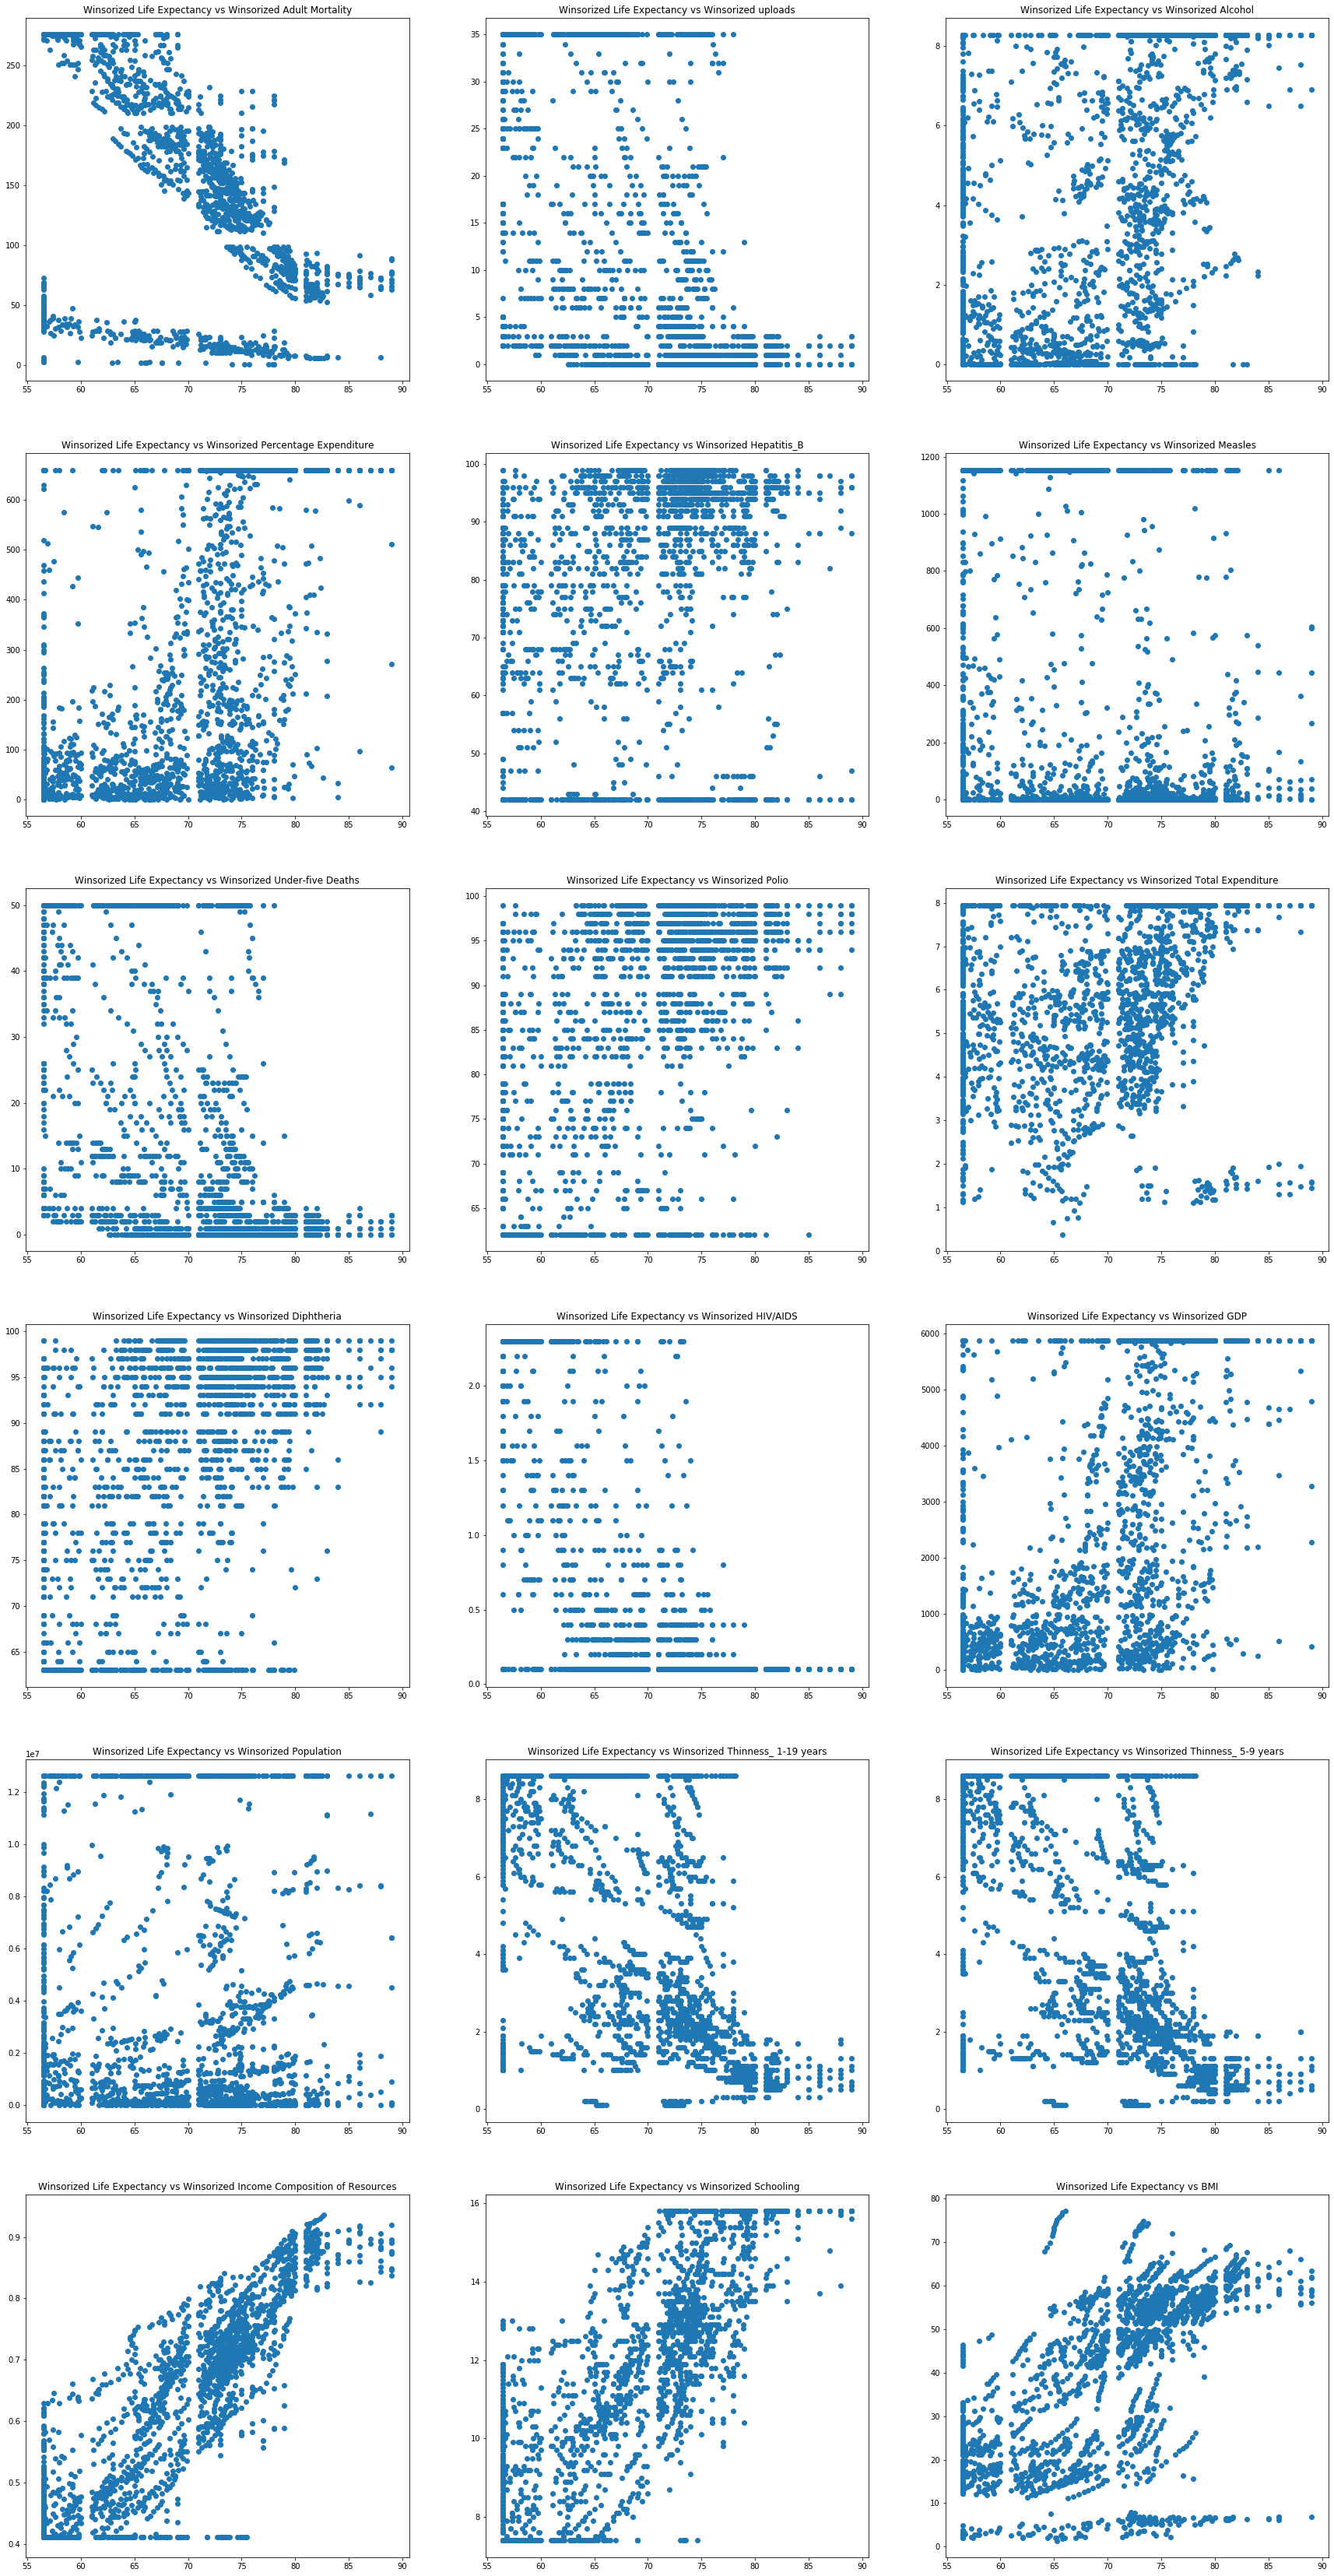

In [31]:
# using scatter plot to compare continus columns with target variable:
plt.figure(figsize=(30,60))

plt.subplot(6,3,1)
plt.scatter(df["life_expectancy_winsorized"], df["adult_Mortality_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Adult Mortality")

plt.subplot(6,3,2)
plt.scatter(df["life_expectancy_winsorized"], df["infant_deaths_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized uploads")

plt.subplot(6,3,3)
plt.scatter(df["life_expectancy_winsorized"], df["alcohol_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Alcohol")

plt.subplot(6,3,4)
plt.scatter(df["life_expectancy_winsorized"], df["percentage_expenditure_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Percentage Expenditure")

plt.subplot(6,3,5)
plt.scatter(df["life_expectancy_winsorized"], df["Hepatitis_B_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Hepatitis_B")

plt.subplot(6,3,6)
plt.scatter(df["life_expectancy_winsorized"], df["Measles_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Measles")

plt.subplot(6,3,7)
plt.scatter(df["life_expectancy_winsorized"], df["under-fivedeaths_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Under-five Deaths")

plt.subplot(6,3,8)
plt.scatter(df["life_expectancy_winsorized"], df["polio_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Polio")

plt.subplot(6,3,9)
plt.scatter(df["life_expectancy_winsorized"], df["total_expenditure_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Total Expenditure")

plt.subplot(6,3,10)
plt.scatter(df["life_expectancy_winsorized"], df["Diphtheria_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Diphtheria")

plt.subplot(6,3,11)
plt.scatter(df["life_expectancy_winsorized"], df["HIV/AIDS_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized HIV/AIDS")

plt.subplot(6,3,12)
plt.scatter(df["life_expectancy_winsorized"], df["GDP_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized GDP")

plt.subplot(6,3,13)
plt.scatter(df["life_expectancy_winsorized"], df["population_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Population")

plt.subplot(6,3,14)
plt.scatter(df["life_expectancy_winsorized"], df["thinness_1-19years_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Thinness_ 1-19 years")

plt.subplot(6,3,15)
plt.scatter(df["life_expectancy_winsorized"], df["thinness_5-9years_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Thinness_ 5-9 years")

plt.subplot(6,3,16)
plt.scatter(df["life_expectancy_winsorized"], df["Income_compositionofresources_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Income Composition of Resources")

plt.subplot(6,3,17)
plt.scatter(df["life_expectancy_winsorized"], df["schooling_winsorized"])
plt.title("Winsorized Life Expectancy vs Winsorized Schooling")

plt.subplot(6,3,18)
plt.scatter(df["life_expectancy_winsorized"], df["BMI"])
plt.title("Winsorized Life Expectancy vs BMI")

plt.show()

The winsorized life expectancy has same direction with Schooling,GDP,Populationand Income composition of resources and has opposite direction with adult mortality.

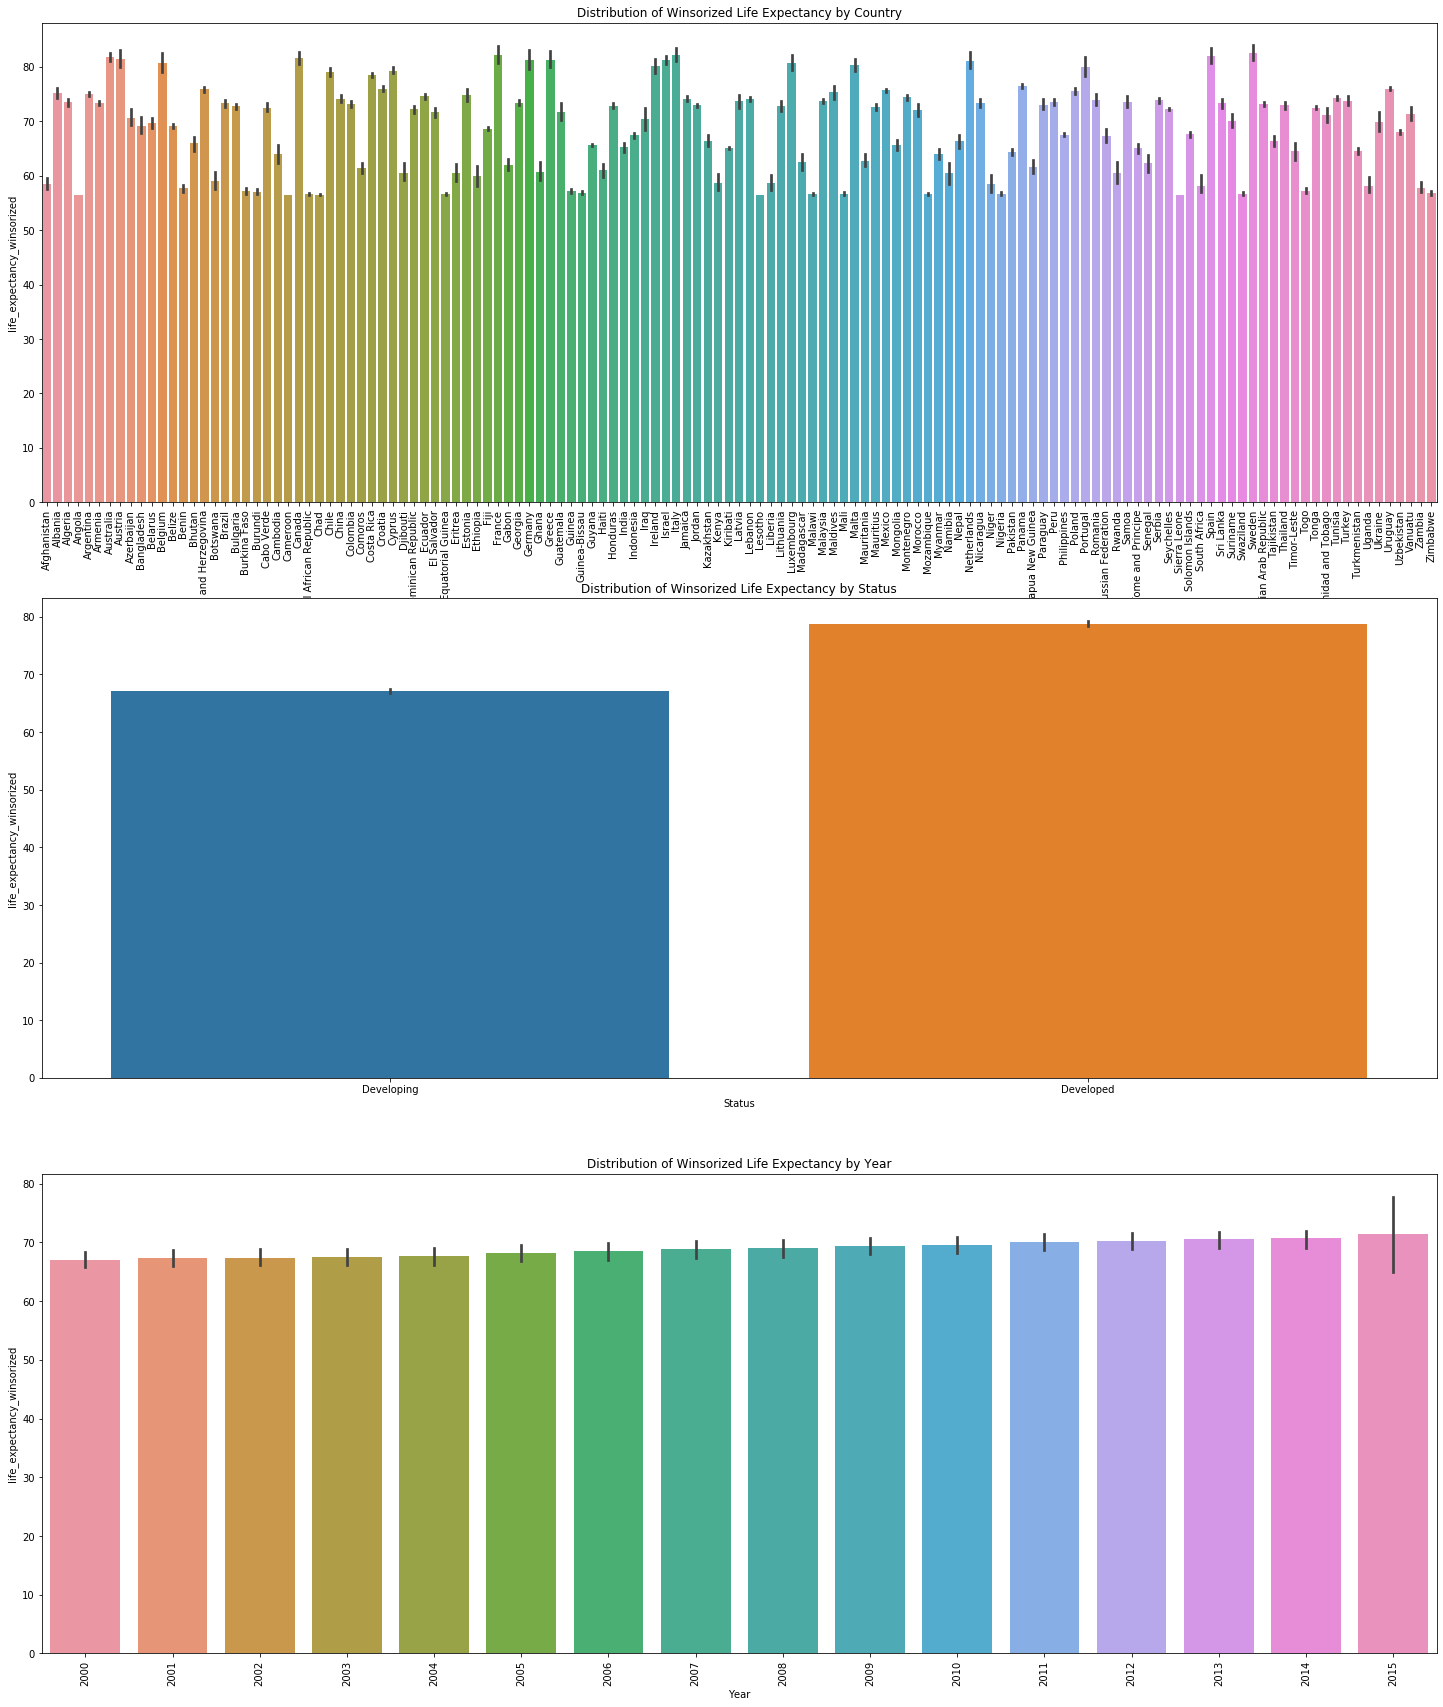

In [32]:
# Using bar plot to compare categorical variable with target variable:
plt.figure(figsize=(25,30))


plt.subplot(3, 1, 1)
sns.barplot(df['Country'], df['life_expectancy_winsorized'])
plt.title('Distribution of Winsorized Life Expectancy by Country')
plt.xticks(rotation=90, fontsize=10)

plt.subplot(3, 1, 2)
sns.barplot(df['Status'], df['life_expectancy_winsorized'])
plt.title('Distribution of Winsorized Life Expectancy by Status')

plt.subplot(3, 1, 3)
sns.barplot(df['Year'], df['life_expectancy_winsorized'])
plt.title('Distribution of Winsorized Life Expectancy by Year')
plt.xticks(rotation=90, fontsize=10)

plt.show()

As you can see winsorized life expectancy is highest in Sweden and in Developed country in year 2015.

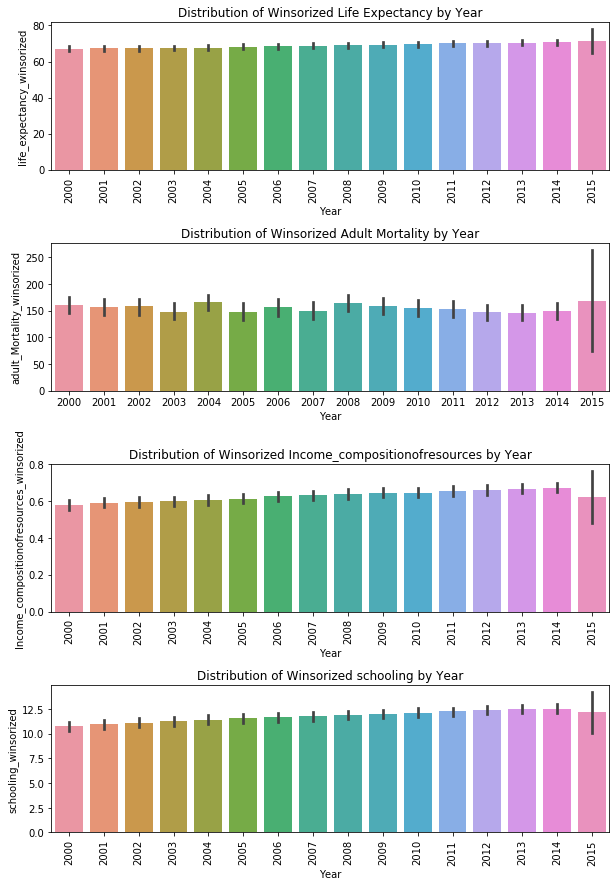

In [33]:
# Using barplot to compare year with other metrics:
plt.figure(figsize=(10,30))


plt.subplot(4, 1, 1)
sns.barplot(df['Year'], df['life_expectancy_winsorized'])
plt.title('Distribution of Winsorized Life Expectancy by Year')
plt.xticks(rotation=90, fontsize=10)

plt.subplot(4, 1, 2)
sns.barplot(df['Year'], df['adult_Mortality_winsorized'])
plt.title('Distribution of Winsorized Adult Mortality by Year')

plt.subplot(4, 1, 3)
sns.barplot(df['Year'], df['Income_compositionofresources_winsorized'])
plt.title('Distribution of Winsorized Income_compositionofresources by Year')
plt.xticks(rotation=90, fontsize=10)

plt.subplot(4, 1, 4)
sns.barplot(df['Year'], df['schooling_winsorized'])
plt.title('Distribution of Winsorized schooling by Year')
plt.xticks(rotation=90, fontsize=10)

plt.subplots_adjust(hspace = 0.5, top = 0.5)
plt.show()

In [34]:
# Now check by statical test to confirm diffrences: 
years = df.Year.unique()
for var in ['life_expectancy_winsorized','adult_Mortality_winsorized','Income_compositionofresources_winsorized','schooling_winsorized']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(years)):
        for j in range(i+1, len(years)):
            print("t-test between groups {0} and {1}:".format(years[i], years[j]))
            print(stats.ttest_ind(df[df["Year"]==years[i]][var], df[df["Year"]==years[j]][var]))

------------------------------------------------
Comparisons for variable: life_expectancy_winsorized
------------------------------------------------
t-test between groups 2015 and 2014:
Ttest_indResult(statistic=0.11826886133093124, pvalue=0.9060357849381346)
t-test between groups 2015 and 2013:
Ttest_indResult(statistic=0.15950617461140112, pvalue=0.8735157609640561)
t-test between groups 2015 and 2012:
Ttest_indResult(statistic=0.19108820366838639, pvalue=0.8487523313326913)
t-test between groups 2015 and 2011:
Ttest_indResult(statistic=0.22952661728579643, pvalue=0.8188149107219856)
t-test between groups 2015 and 2010:
Ttest_indResult(statistic=0.308863906290873, pvalue=0.7579120023469967)
t-test between groups 2015 and 2009:
Ttest_indResult(statistic=0.35549153488225543, pvalue=0.7227888225216134)
t-test between groups 2015 and 2008:
Ttest_indResult(statistic=0.41013234668795795, pvalue=0.6823737536054586)
t-test between groups 2015 and 2007:
Ttest_indResult(statistic=0.425534777

Ttest_indResult(statistic=1.0806591551064486, pvalue=0.28083496616717835)
t-test between groups 2007 and 2003:
Ttest_indResult(statistic=1.2254076516478207, pvalue=0.22151376634786546)
t-test between groups 2007 and 2002:
Ttest_indResult(statistic=1.3474893534268833, pvalue=0.17897797439639515)
t-test between groups 2007 and 2001:
Ttest_indResult(statistic=1.4691105887653761, pvalue=0.14299338769782177)
t-test between groups 2007 and 2000:
Ttest_indResult(statistic=1.7242579965677565, pvalue=0.0858318334408413)
t-test between groups 2006 and 2005:
Ttest_indResult(statistic=0.3033837038969094, pvalue=0.7618364089671698)
t-test between groups 2006 and 2004:
Ttest_indResult(statistic=0.8046503088231068, pvalue=0.4217455307554787)
t-test between groups 2006 and 2003:
Ttest_indResult(statistic=0.9478131022269578, pvalue=0.34409138036908515)
t-test between groups 2006 and 2002:
Ttest_indResult(statistic=1.0699756335573802, pvalue=0.28560755308056623)
t-test between groups 2006 and 2001:
Ttes

Ttest_indResult(statistic=0.6367425481734383, pvalue=0.5248506128328168)
t-test between groups 2013 and 2010:
Ttest_indResult(statistic=1.0747820764043272, pvalue=0.2834648863459713)
t-test between groups 2013 and 2009:
Ttest_indResult(statistic=1.2527977690300878, pvalue=0.21140058587995605)
t-test between groups 2013 and 2008:
Ttest_indResult(statistic=1.5214913318630883, pvalue=0.1293471546412109)
t-test between groups 2013 and 2007:
Ttest_indResult(statistic=1.8604450366579404, pvalue=0.06394294648501551)
t-test between groups 2013 and 2006:
Ttest_indResult(statistic=2.1708717045256307, pvalue=0.030838883329709608)
t-test between groups 2013 and 2005:
Ttest_indResult(statistic=2.808124950338327, pvalue=0.005358035128147923)
t-test between groups 2013 and 2004:
Ttest_indResult(statistic=3.1968376501857896, pvalue=0.0015599430026911607)
t-test between groups 2013 and 2003:
Ttest_indResult(statistic=3.585806744482348, pvalue=0.0004007660352583679)
t-test between groups 2013 and 2002:


Ttest_indResult(statistic=0.32134590190050183, pvalue=0.7484527162374655)
t-test between groups 2015 and 2004:
Ttest_indResult(statistic=0.38313408775633345, pvalue=0.70223202702635)
t-test between groups 2015 and 2003:
Ttest_indResult(statistic=0.4668223278110204, pvalue=0.6413908084332618)
t-test between groups 2015 and 2002:
Ttest_indResult(statistic=0.5291526628622514, pvalue=0.5975816074201419)
t-test between groups 2015 and 2001:
Ttest_indResult(statistic=0.6192143219213385, pvalue=0.5368344178031514)
t-test between groups 2015 and 2000:
Ttest_indResult(statistic=0.7073698737143715, pvalue=0.4805742895984657)
t-test between groups 2014 and 2013:
Ttest_indResult(statistic=0.24054022084436377, pvalue=0.8101010434717383)
t-test between groups 2014 and 2012:
Ttest_indResult(statistic=0.5365052419750626, pvalue=0.5920681580893039)
t-test between groups 2014 and 2011:
Ttest_indResult(statistic=0.9782814286693754, pvalue=0.32884103977676404)
t-test between groups 2014 and 2010:
Ttest_in

Ttest_indResult(statistic=2.666741668718009, pvalue=0.008132027667883866)
t-test between groups 2005 and 2004:
Ttest_indResult(statistic=0.38009891903464726, pvalue=0.7041776031870189)
t-test between groups 2005 and 2003:
Ttest_indResult(statistic=0.8958975167789819, pvalue=0.3711236553330238)
t-test between groups 2005 and 2002:
Ttest_indResult(statistic=1.2694941114037077, pvalue=0.2053828332028743)
t-test between groups 2005 and 2001:
Ttest_indResult(statistic=1.7542464632222288, pvalue=0.08054851809419741)
t-test between groups 2005 and 2000:
Ttest_indResult(statistic=2.3194046045744425, pvalue=0.021136529679886804)
t-test between groups 2004 and 2003:
Ttest_indResult(statistic=0.515462622394887, pvalue=0.606661151628698)
t-test between groups 2004 and 2002:
Ttest_indResult(statistic=0.8877624180392356, pvalue=0.3754766429472528)
t-test between groups 2004 and 2001:
Ttest_indResult(statistic=1.3667368440434338, pvalue=0.1728705892025845)
t-test between groups 2004 and 2000:
Ttest_i

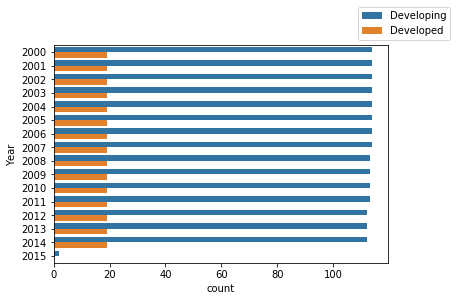

In [35]:
# Using countplot to compare categorical variable:
sns.countplot(y="Year", hue="Status", data=df)
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1.2))
plt.show()

In [36]:
# Now check by statical test to confirm diffrences: 
count_table = pd.crosstab(df["Status"], df["Year"])
count_table

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Status,,,,,,,,,,,,,,,,
Developed,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,0
Developing,114,114,114,114,114,114,114,114,113,113,113,113,112,112,112,2


In [37]:
# Using Chisquare test to confirm:
print(stats.chisquare(count_table, axis=None))

Power_divergenceResult(statistic=1203.2566683442376, pvalue=3.1778683538888835e-233)


As you can see P_value less than 0.05 means that the diffrences between status and year significantly different.

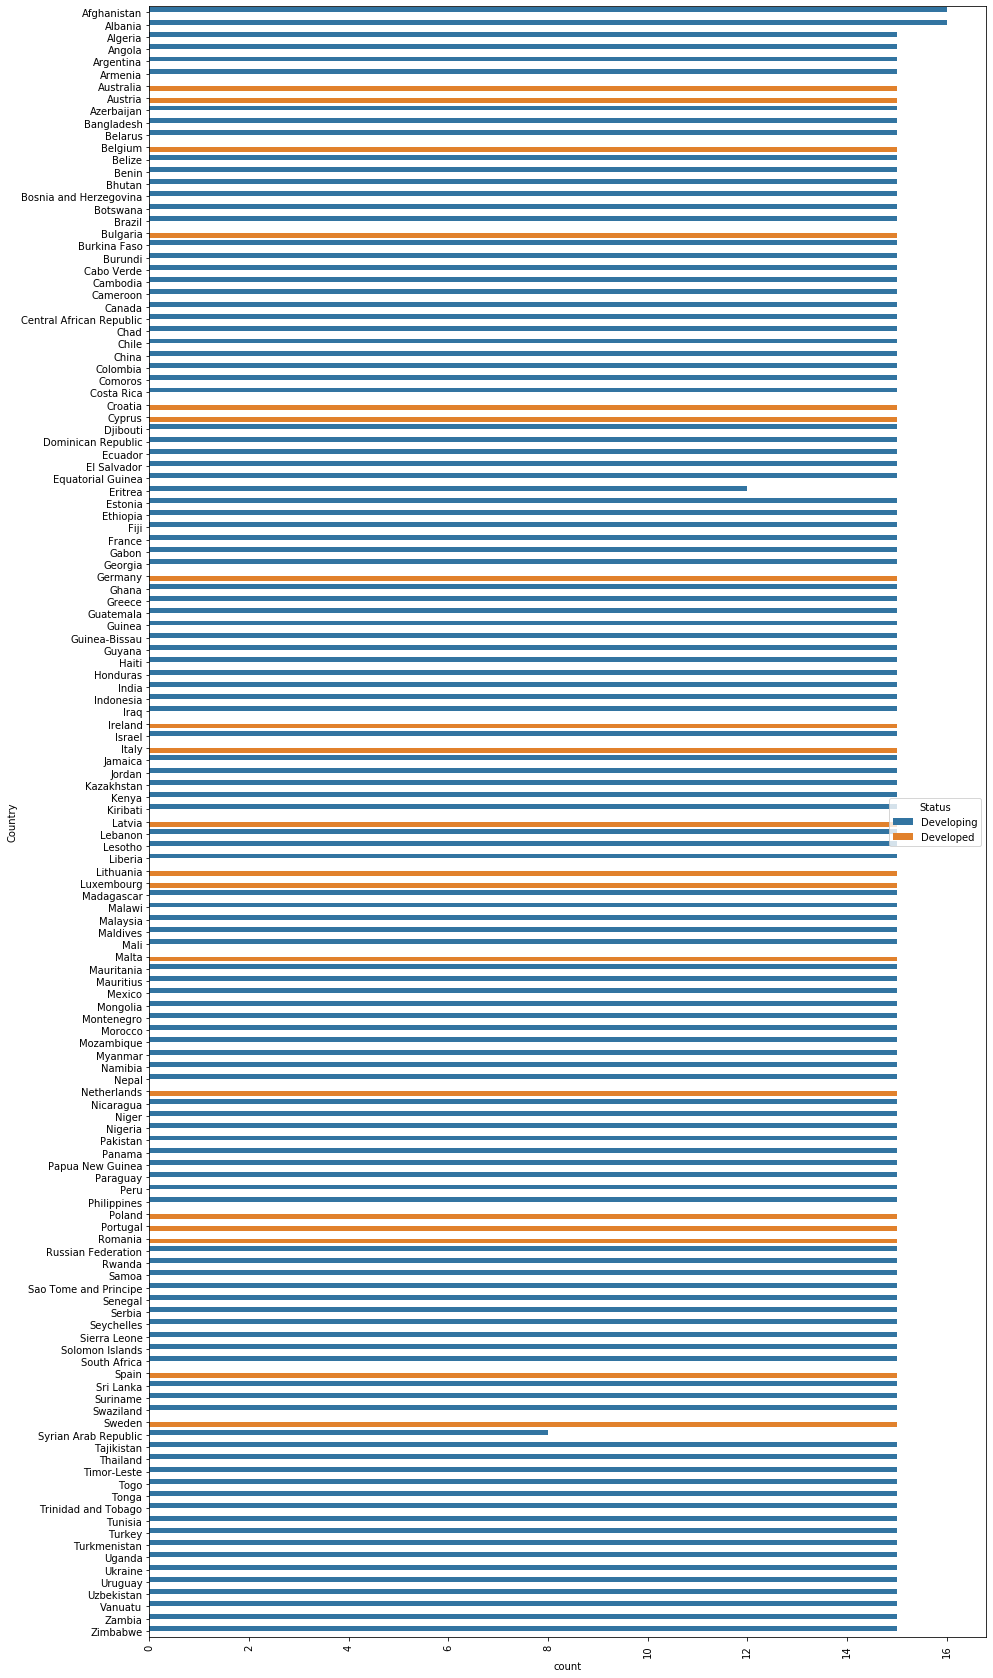

In [38]:
# Using countplot to compare categorical variable:
plt.figure(figsize=(15,30))
sns.countplot(y="Country", hue="Status", data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

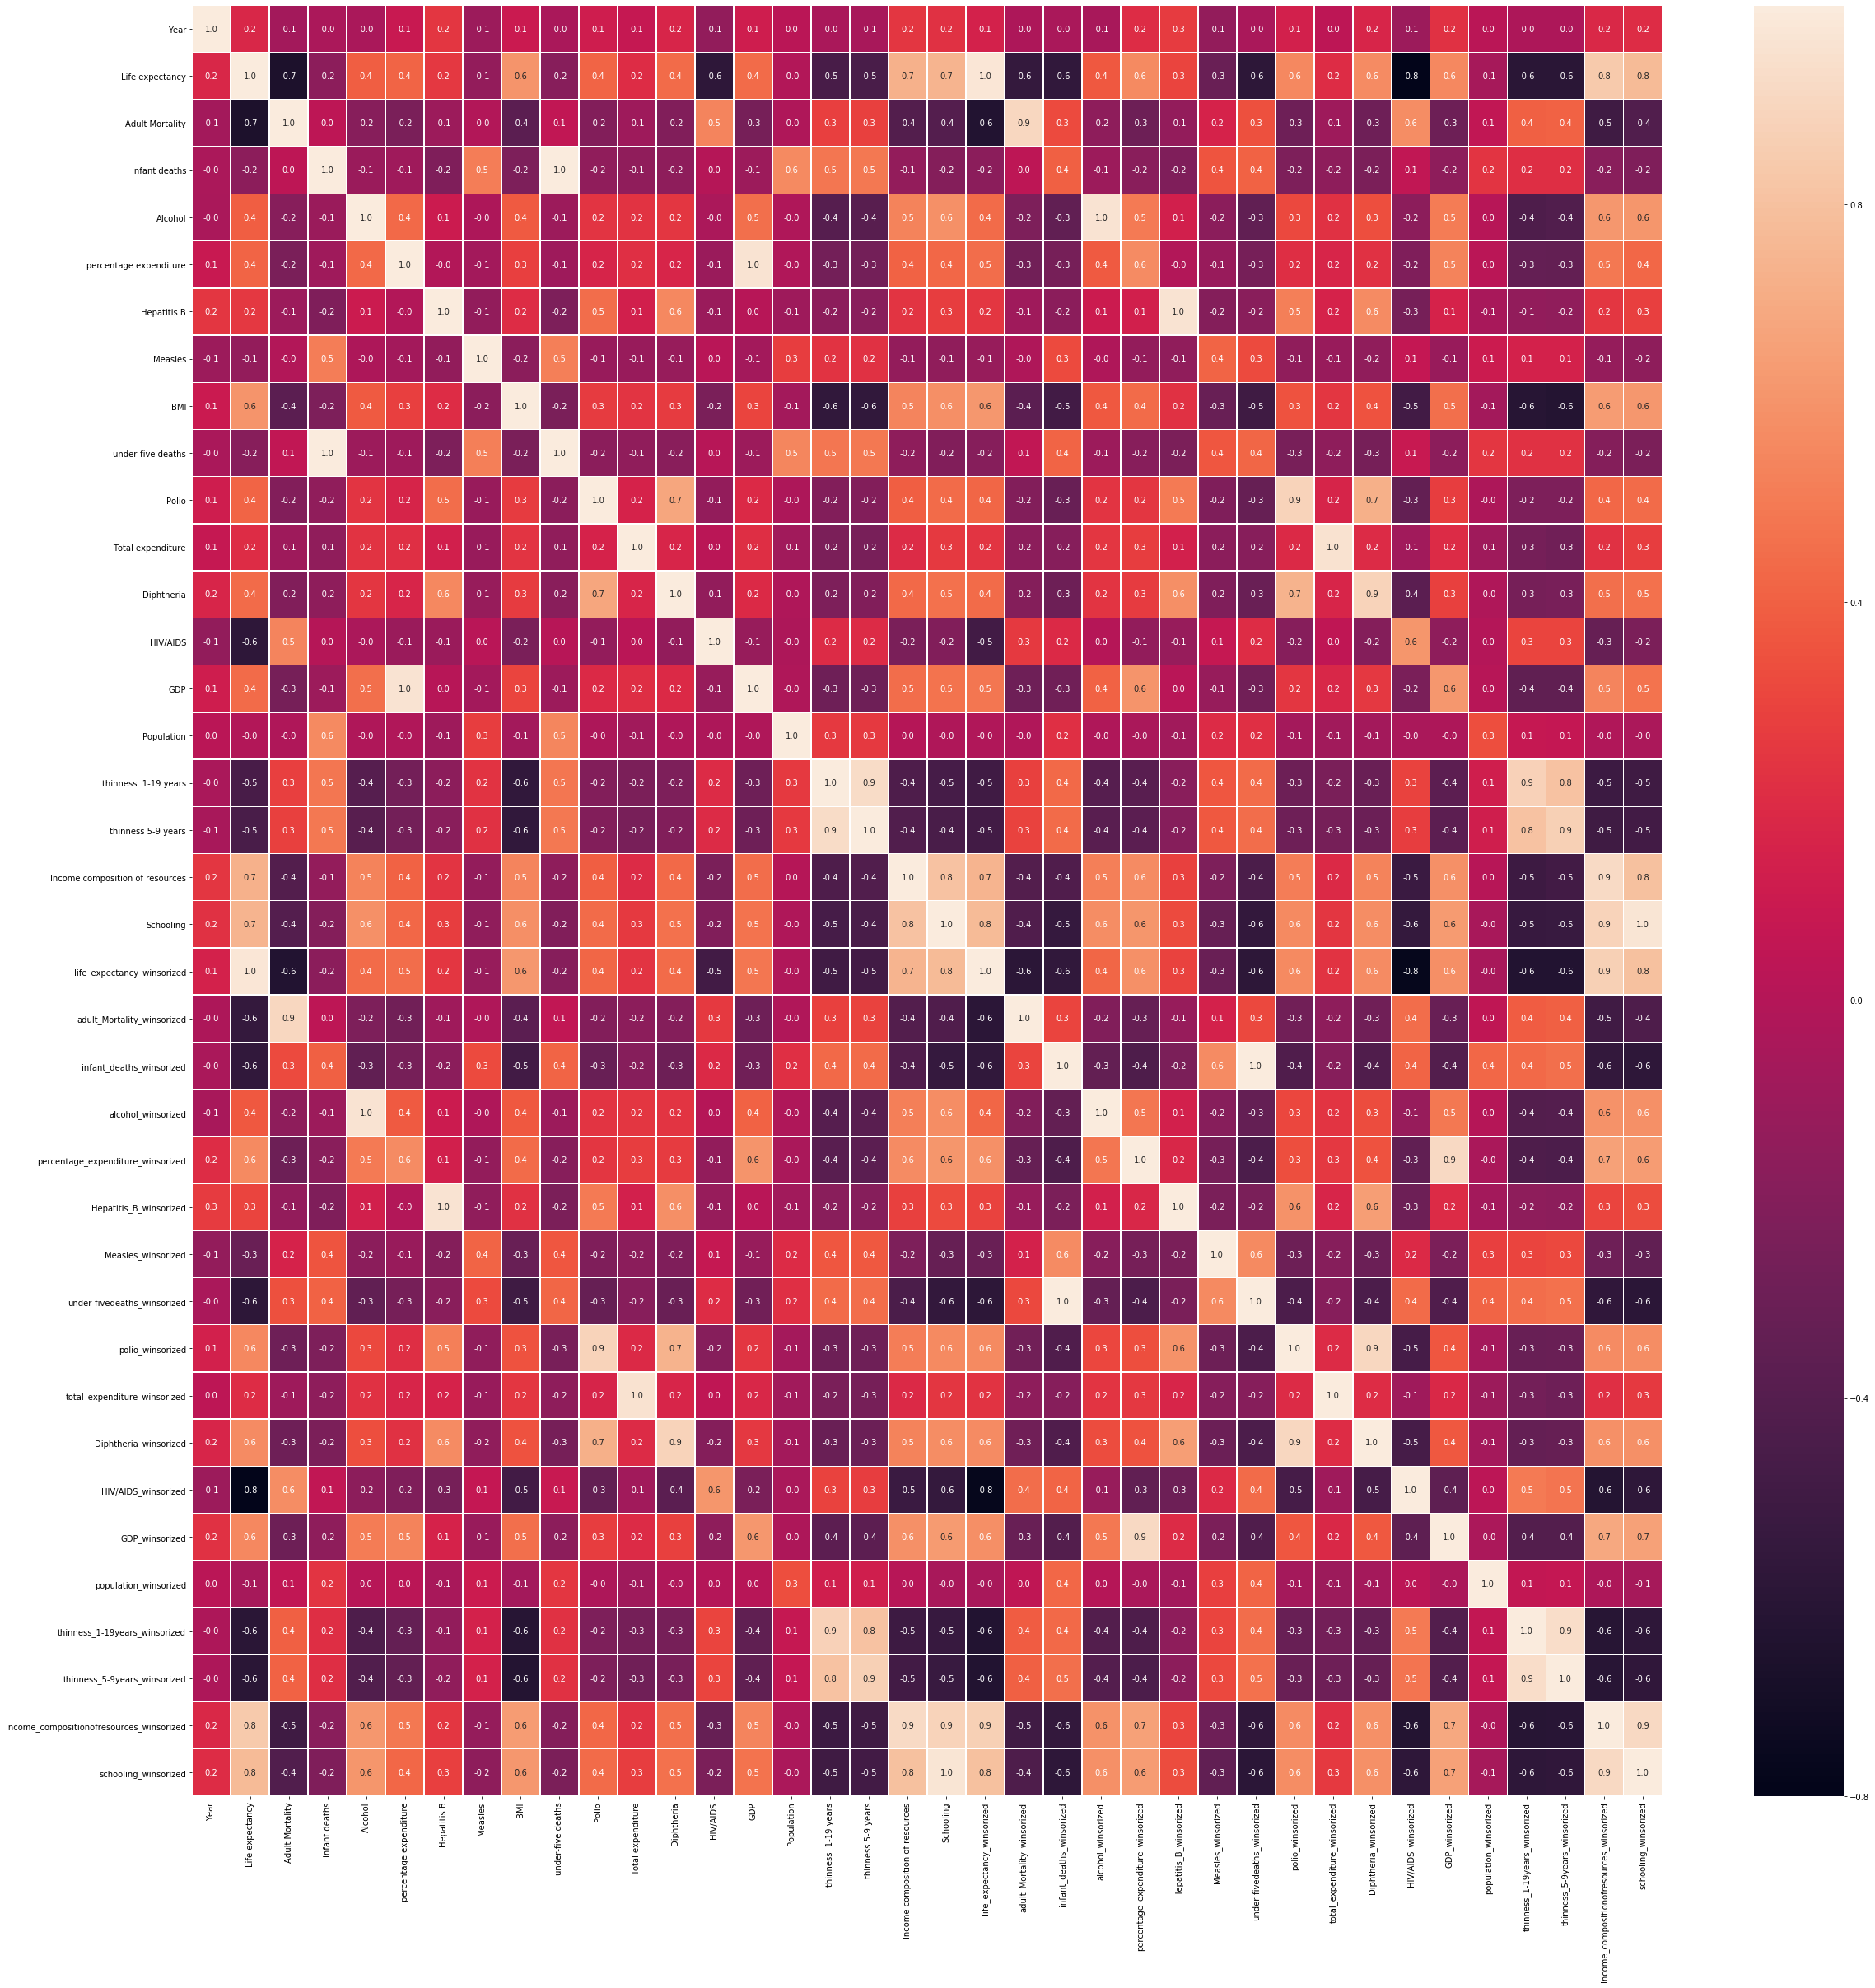

In [39]:
# Using heatmap to see corelation between variables:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

As you can see winsorized life expectancy has strong correlation with winsorized of Income composition of resources of resources and winsorized schooling.

4.In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

In [40]:
# Since most models require that all data be numeric,we want to convert Status as categorical data to numeric:
df_status=pd.get_dummies(df['Status'])
df_status

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [41]:
# Adding dummies to the dataset:
df = pd.concat([df, df_status],axis=1)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria_winsorized,HIV/AIDS_winsorized,GDP_winsorized,population_winsorized,thinness_1-19years_winsorized,thinness_5-9years_winsorized,Income_compositionofresources_winsorized,schooling_winsorized,Developed,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,12633897.0,8.6,8.6,0.479,10.1,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,63.0,0.1,612.696514,327582.0,8.6,8.6,0.476,10.0,0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,12633897.0,8.6,8.6,0.470,9.9,0,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,8.6,8.6,0.463,9.8,0,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,8.6,8.6,0.454,9.5,0,1
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,0.1,553.328940,2883167.0,8.6,8.6,0.448,9.2,0,1
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,0.1,445.893298,284331.0,8.6,8.6,0.434,8.9,0,1
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,0.1,373.361116,2729431.0,8.6,8.6,0.433,8.7,0,1
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,0.1,369.835796,12633897.0,8.6,8.6,0.415,8.4,0,1
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,63.0,0.1,272.563770,2589345.0,8.6,8.6,0.412,8.1,0,1


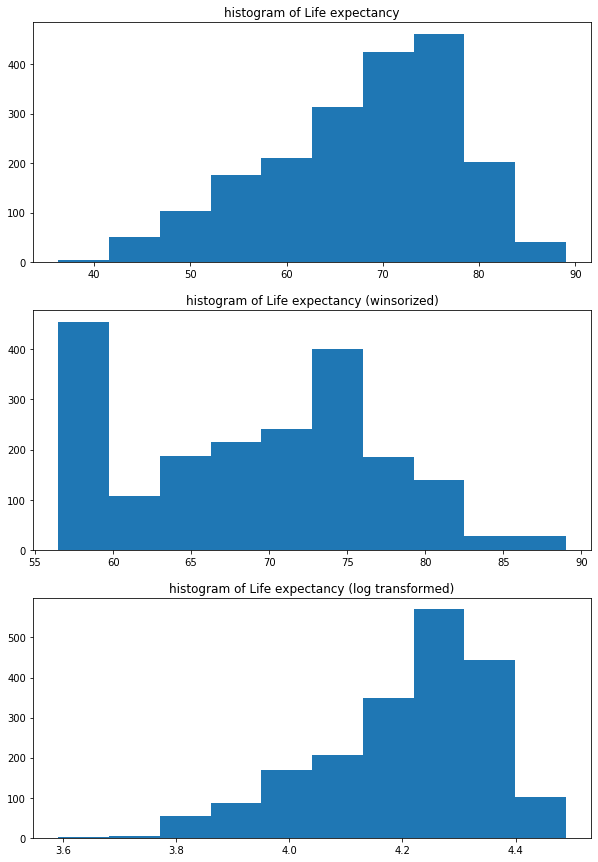

In [42]:
# For meodeling we have to assume the target variable to be normally distributed. So we can this with log.

plt.figure(figsize=(10,15))

# histograms of the original data
plt.subplot(3, 1, 1)
plt.hist(df["Life expectancy"])
plt.title("histogram of Life expectancy")


# histograms of the winsorized data
plt.subplot(3, 1, 2)
plt.hist(df["life_expectancy_winsorized"])
plt.title("histogram of Life expectancy (winsorized)")



# histograms of the log transformed data
plt.subplot(3, 1, 3)
plt.hist(np.log(df["Life expectancy"]))
plt.title("histogram of Life expectancy (log transformed)")


plt.show()

As you can see, the hist plot of  life expectancy (log transformed) has more close to normal distribution.

In [43]:
# We can confirm distribution by using the Jargue-Bera and Normal tests
jb_lifeexpectancy = jarque_bera(np.log(df["Life expectancy"]))
norm_lifeexpectancy = normaltest(np.log(df["Life expectancy"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_lifeexpectancy[0], jb_lifeexpectancy[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_lifeexpectancy[0], norm_lifeexpectancy[1]))

Jarque-Bera test statistics is 240.21201162935398 and p value is 0.0
Normality test statistics is 186.04993280514162 and p value is 3.9789676856387254e-41


The p-values  are 0 or close to 0 which indicates that the distribution of the log transformed variables is statistically different from the normal distribution.

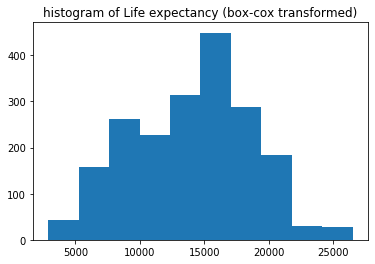

In [44]:
# For meodeling we have to assume the target variable to be normally distributed. So we can this with coxbox.
life_expectancy_boxcox,_ = boxcox(df['Life expectancy'])

# histograms of the box-cox transformed data:

plt.hist(life_expectancy_boxcox)
plt.title("histogram of Life expectancy (box-cox transformed)")

plt.show()

As you can see with log and coxbox the data distribution are different from normal but more close to the normal distribution.

In [45]:
# We can confirm distribution by using the Jargue-Bera and Normal tests:
jb_life_expectancy_boxcox = jarque_bera(life_expectancy_boxcox)
norm_life_expectancy_boxcox = normaltest(life_expectancy_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_life_expectancy_boxcox[0], jb_life_expectancy_boxcox[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_life_expectancy_boxcox[0], norm_life_expectancy_boxcox[1]))

  

Jarque-Bera test statistics is 29.198186113786065 and p value is 4.5676671045491446e-07
Normality test statistics is 55.31523115706349 and p value is 9.737560559589736e-13


Text(0, 0.5, 'winsorized value (normalized)')

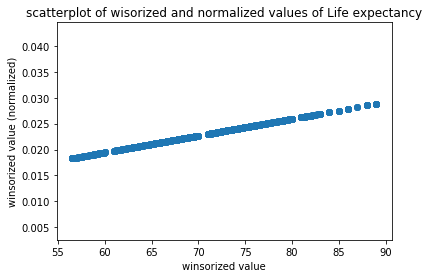

In [46]:
# For meodeling we have to assume the target variable to be Normalized and standardized.
df["norm_winsorized_lifeexpectancy"] = normalize(np.array(df["life_expectancy_winsorized"]).reshape(1,-1)).reshape(-1,1)

# Draw the scatter plot using seaborn.
plt.scatter(df["life_expectancy_winsorized"], df["norm_winsorized_lifeexpectancy"])
plt.title("scatterplot of wisorized and normalized values of Life expectancy")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

Text(0, 0.5, 'winsorized value (standardized)')

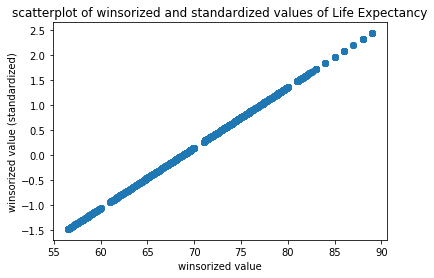

In [47]:
# Doing standardized target variable:
df["scaled_winsorized_lifeexpectancy"] = scale(df["life_expectancy_winsorized"])

# Draw the scatter plot using seaborn.
plt.scatter(df["life_expectancy_winsorized"], df["scaled_winsorized_lifeexpectancy"])
plt.title("scatterplot of winsorized and standardized values of Life Expectancy")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")

In [48]:
# Findout correlationship between variables: 
df[['life_expectancy_winsorized', 'adult_Mortality_winsorized',  'infant_deaths_winsorized', 'alcohol_winsorized', 
    'percentage_expenditure_winsorized',  'Hepatitis_B_winsorized', 'Measles_winsorized', 'under-fivedeaths_winsorized',
    'polio_winsorized','total_expenditure_winsorized', 'Diphtheria_winsorized', 'HIV/AIDS_winsorized', 'GDP_winsorized',
    'population_winsorized', 'thinness_1-19years_winsorized', 'thinness_5-9years_winsorized','Income_compositionofresources_winsorized',
    'schooling_winsorized']].corr()
    

,life_expectancy_winsorized,adult_Mortality_winsorized,infant_deaths_winsorized,alcohol_winsorized,percentage_expenditure_winsorized,Hepatitis_B_winsorized,Measles_winsorized,under-fivedeaths_winsorized,polio_winsorized,total_expenditure_winsorized,Diphtheria_winsorized,HIV/AIDS_winsorized,GDP_winsorized,population_winsorized,thinness_1-19years_winsorized,thinness_5-9years_winsorized,Income_compositionofresources_winsorized,schooling_winsorized
life_expectancy_winsorized,1.000000,-0.590313,-0.566626,0.417654,0.587675,0.294405,-0.311991,-0.588787,0.557800,0.229005,0.568525,-0.776113,0.582849,-0.049996,-0.634684,-0.633175,0.871485,0.800348
adult_Mortality_winsorized,-0.590313,1.000000,0.302819,-0.214962,-0.325413,-0.118807,0.147222,0.314118,-0.277865,-0.153717,-0.281524,0.444725,-0.319163,0.046779,0.384649,0.398392,-0.494990,-0.434066
infant_deaths_winsorized,-0.566626,0.302819,1.000000,-0.338045,-0.430218,-0.232440,0.566746,0.995525,-0.420896,-0.188864,-0.422034,0.411628,-0.412704,0.426949,0.436259,0.453577,-0.555112,-0.580732
alcohol_winsorized,0.417654,-0.214962,-0.338045,1.000000,0.484247,0.137646,-0.182977,-0.332590,0.309080,0.240573,0.327632,-0.118566,0.493369,0.006619,-0.412222,-0.399767,0.596430,0.589119
percentage_expenditure_winsorized,0.587675,-0.325413,-0.430218,0.484247,1.000000,0.172120,-0.252078,-0.434737,0.336222,0.254049,0.350843,-0.344746,0.913679,-0.042805,-0.431373,-0.435414,0.659081,0.635941
Hepatitis_B_winsorized,0.294405,-0.118807,-0.232440,0.137646,0.172120,1.000000,-0.243419,-0.242662,0.598985,0.165375,0.644603,-0.298642,0.194533,-0.071351,-0.157351,-0.166933,0.302735,0.330331
Measles_winsorized,-0.311991,0.147222,0.566746,-0.182977,-0.252078,-0.243419,1.000000,0.562962,-0.298157,-0.191779,-0.303715,0.187919,-0.231333,0.280540,0.303468,0.313328,-0.288326,-0.344481
under-fivedeaths_winsorized,-0.588787,0.314118,0.995525,-0.332590,-0.434737,-0.242662,0.562962,1.000000,-0.436559,-0.188449,-0.437883,0.440084,-0.420319,0.411454,0.447454,0.464712,-0.573552,-0.594922
polio_winsorized,0.557800,-0.277865,-0.420896,0.309080,0.336222,0.598985,-0.298157,-0.436559,1.000000,0.195470,0.903161,-0.466257,0.362275,-0.064381,-0.316192,-0.313071,0.569621,0.573944
total_expenditure_winsorized,0.229005,-0.153717,-0.188864,0.240573,0.254049,0.165375,-0.191779,-0.188449,0.195470,1.000000,0.201687,-0.083621,0.184330,-0.097963,-0.268289,-0.292315,0.216221,0.260973


As you can see, winsorized of Life Espectancy has strong correlation with Income_compositionofresources_winsorized and schooling_winsorized.

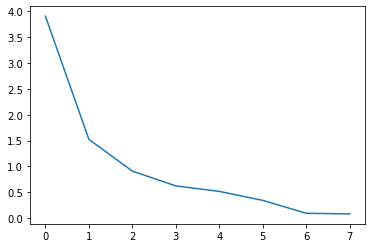

[3.90684336 1.52513703 0.90985969 0.6243544  0.51763069 0.343747
 0.09434054 0.0821155 ]


In [52]:
# Use eig_val plot to know how many component describe more percentage of variance in the data set:
x= df[['life_expectancy_winsorized', 'alcohol_winsorized', 'percentage_expenditure_winsorized', 'Hepatitis_B_winsorized',
    'polio_winsorized','total_expenditure_winsorized', 'Diphtheria_winsorized', 'GDP_winsorized']]
x=StandardScaler().fit_transform(x)
Xt = x.T
Cx = np.cov(Xt)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
# print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

In [ ]:
As you can see the three of components have lots of variance.

In [50]:
# Apply PCA to the x and see how much of the total variance is explained by the 1st component.

x= df[['life_expectancy_winsorized', 'alcohol_winsorized', 'percentage_expenditure_winsorized', 'Hepatitis_B_winsorized',
    'polio_winsorized','total_expenditure_winsorized', 'Diphtheria_winsorized', 'GDP_winsorized']]

x=StandardScaler().fit_transform(x)
sklearn_pca = PCA(n_components=1)
df['pca1']=sklearn_pca.fit_transform(x)
print('By Applying PCA, the Percentage of Total Variance in dataset is explaind by the first component is:\n',
       sklearn_pca.explained_variance_ratio_
     )

By Applying PCA, the Percentage of Total Variance in dataset is explaind by the first component is:
 [0.48810964]


In [51]:
df[['life_expectancy_winsorized', 'pca1']].corr()

,life_expectancy_winsorized,pca1
life_expectancy_winsorized,1.000000,0.792146
pca1,0.792146,1.000000


The correlation between life_expectancy_winsorized and pca1 are around 0.80.

5.Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

The highest and lowest average of Life Expectancy are for Sweden and Sierra Leoni respectively.
As I expected the LIfe expectancy In developed country and recent years are higher.
Also, life expectancy has strong relationship with Income composition of resources and schooling, and irrelative with adult_Mortality.
After normalization and standardization of variables, remove some variables and then doing PCA.
PCA works best when the variables involved range from weak to moderately strong correlations. Correlations of 0, or correlations greater than .7 or .8, create problems. Correlations near 0 mean there is no shared information and crrelations that are too high can result in components that are unstable. Therefor, a few very high or very low correlations are fine. When we have a variable with mostly very high or very low correlations with other variables that problems can occur. So, I delete all strong or negative ones and then do PCA. By Applying PCA, the Percentage of Total Variance in dataset is explaind by the first component is:0.49 which means 49% of total variance shared information with first component.
Also life expectancy and PCA has a strong correlation around 80% which means the variables choose for PCA and target value are correctly.